In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# **Read Data**

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
!ls "/gdrive/My Drive/Crime"

Crime_Data_2015.csv  Crime_Data_2017.csv  Crime_Data_2019.csv
Crime_Data_2016.csv  Crime_Data_2018.csv


In [4]:
crime_1 = pd.read_csv('/gdrive/My Drive/Crime/Crime_Data_2015.csv')
crime_2 = pd.read_csv('/gdrive/My Drive/Crime/Crime_Data_2016.csv')
crime_3 = pd.read_csv('/gdrive/My Drive/Crime/Crime_Data_2017.csv')
crime_4 = pd.read_csv('/gdrive/My Drive/Crime/Crime_Data_2018.csv')
crime_5 = pd.read_csv('/gdrive/My Drive/Crime/Crime_Data_2019.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# **Most Crimes & Zip code**

In [10]:
crime_5

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
0,80-21-011027,2021-02-26 15:51:00,2021-02-26 15:14:00,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,ASSAULT,13B,PART II,COMPLETED,1ST DIVISION,111,RESIDENCE / HOME,2900 BLOCK ALFORD AVE ...,LOUISVILLE,40212,13278
1,80-21-012203,2021-03-04 14:14:00,2021-03-04 14:00:00,VIOLATION OF KENTUCKY EPO/DVO,ASSAULT,90F,PART II,COMPLETED,6TH DIVISION,613,RESIDENCE / HOME,2000 BLOCK PEABODY LN ...,LOUISVILLE,40218,13279
2,80-21-012025,2021-03-03 17:33:00,2021-03-03 17:33:00,VIOLATION OF KENTUCKY EPO/DVO,ASSAULT,90F,PART II,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,8300 BLOCK GLOXINIA DR ...,LOUISVILLE,40258,13280
3,80-21-012384,2021-03-05 22:32:00,2021-02-19 16:00:00,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,1ST DIVISION,111,RESIDENCE / HOME,3600 BLOCK RUDD AVE ...,LOUISVILLE,40212,13281
4,80-21-500293,2021-03-05 23:40:00,2021-02-18 23:00:00,ANY NON CRIMINAL CHARGE NOT COVERED BY THESE C...,OTHER,90Z,PART II,COMPLETED,4TH DIVISION,411,RESIDENCE / HOME,900 BLOCK S 6TH ST ...,LOUISVILLE,40203,13282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200432,80-21-012369,2021-03-05 20:22:29,2021-03-03 21:00:00,CRIMINAL MISCHIEF-2ND DEGREE,VANDALISM,290,PART II,COMPLETED,5TH DIVISION,521,RESIDENCE / HOME,600 BLOCK EMILY RD ...,LOUISVILLE,40206,1312158
200433,80-21-012370,2021-03-05 20:32:35,2021-02-20 15:00:00,THEFT BY FAIL TO MAKE REQ DISPOSITION OF PROP ...,FRAUD,26A,PART II,COMPLETED,5TH DIVISION,513,RENTAL / STORAGE FACILITY,2100 BLOCK BARDSTOWN RD ...,LOUISVILLE,40205,1312159
200434,80-21-011835,2021-03-02 17:27:00,2021-03-02 17:13:00,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,ASSAULT,13B,PART II,COMPLETED,4TH DIVISION,423,RESIDENCE / HOME,900 BLOCK CAMDEN AVE ...,LOUISVILLE,40215,1312160
200435,80-21-011883,2021-03-03 00:47:00,2021-03-03 00:47:00,VIOLATION OF KENTUCKY EPO/DVO,ASSAULT,90F,PART II,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,800 BLOCK MULBERRY ST ...,LOUISVILLE,40217,1312161


In [8]:
crimes = pd.concat([crime_1, crime_2, crime_3, crime_4, crime_5])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


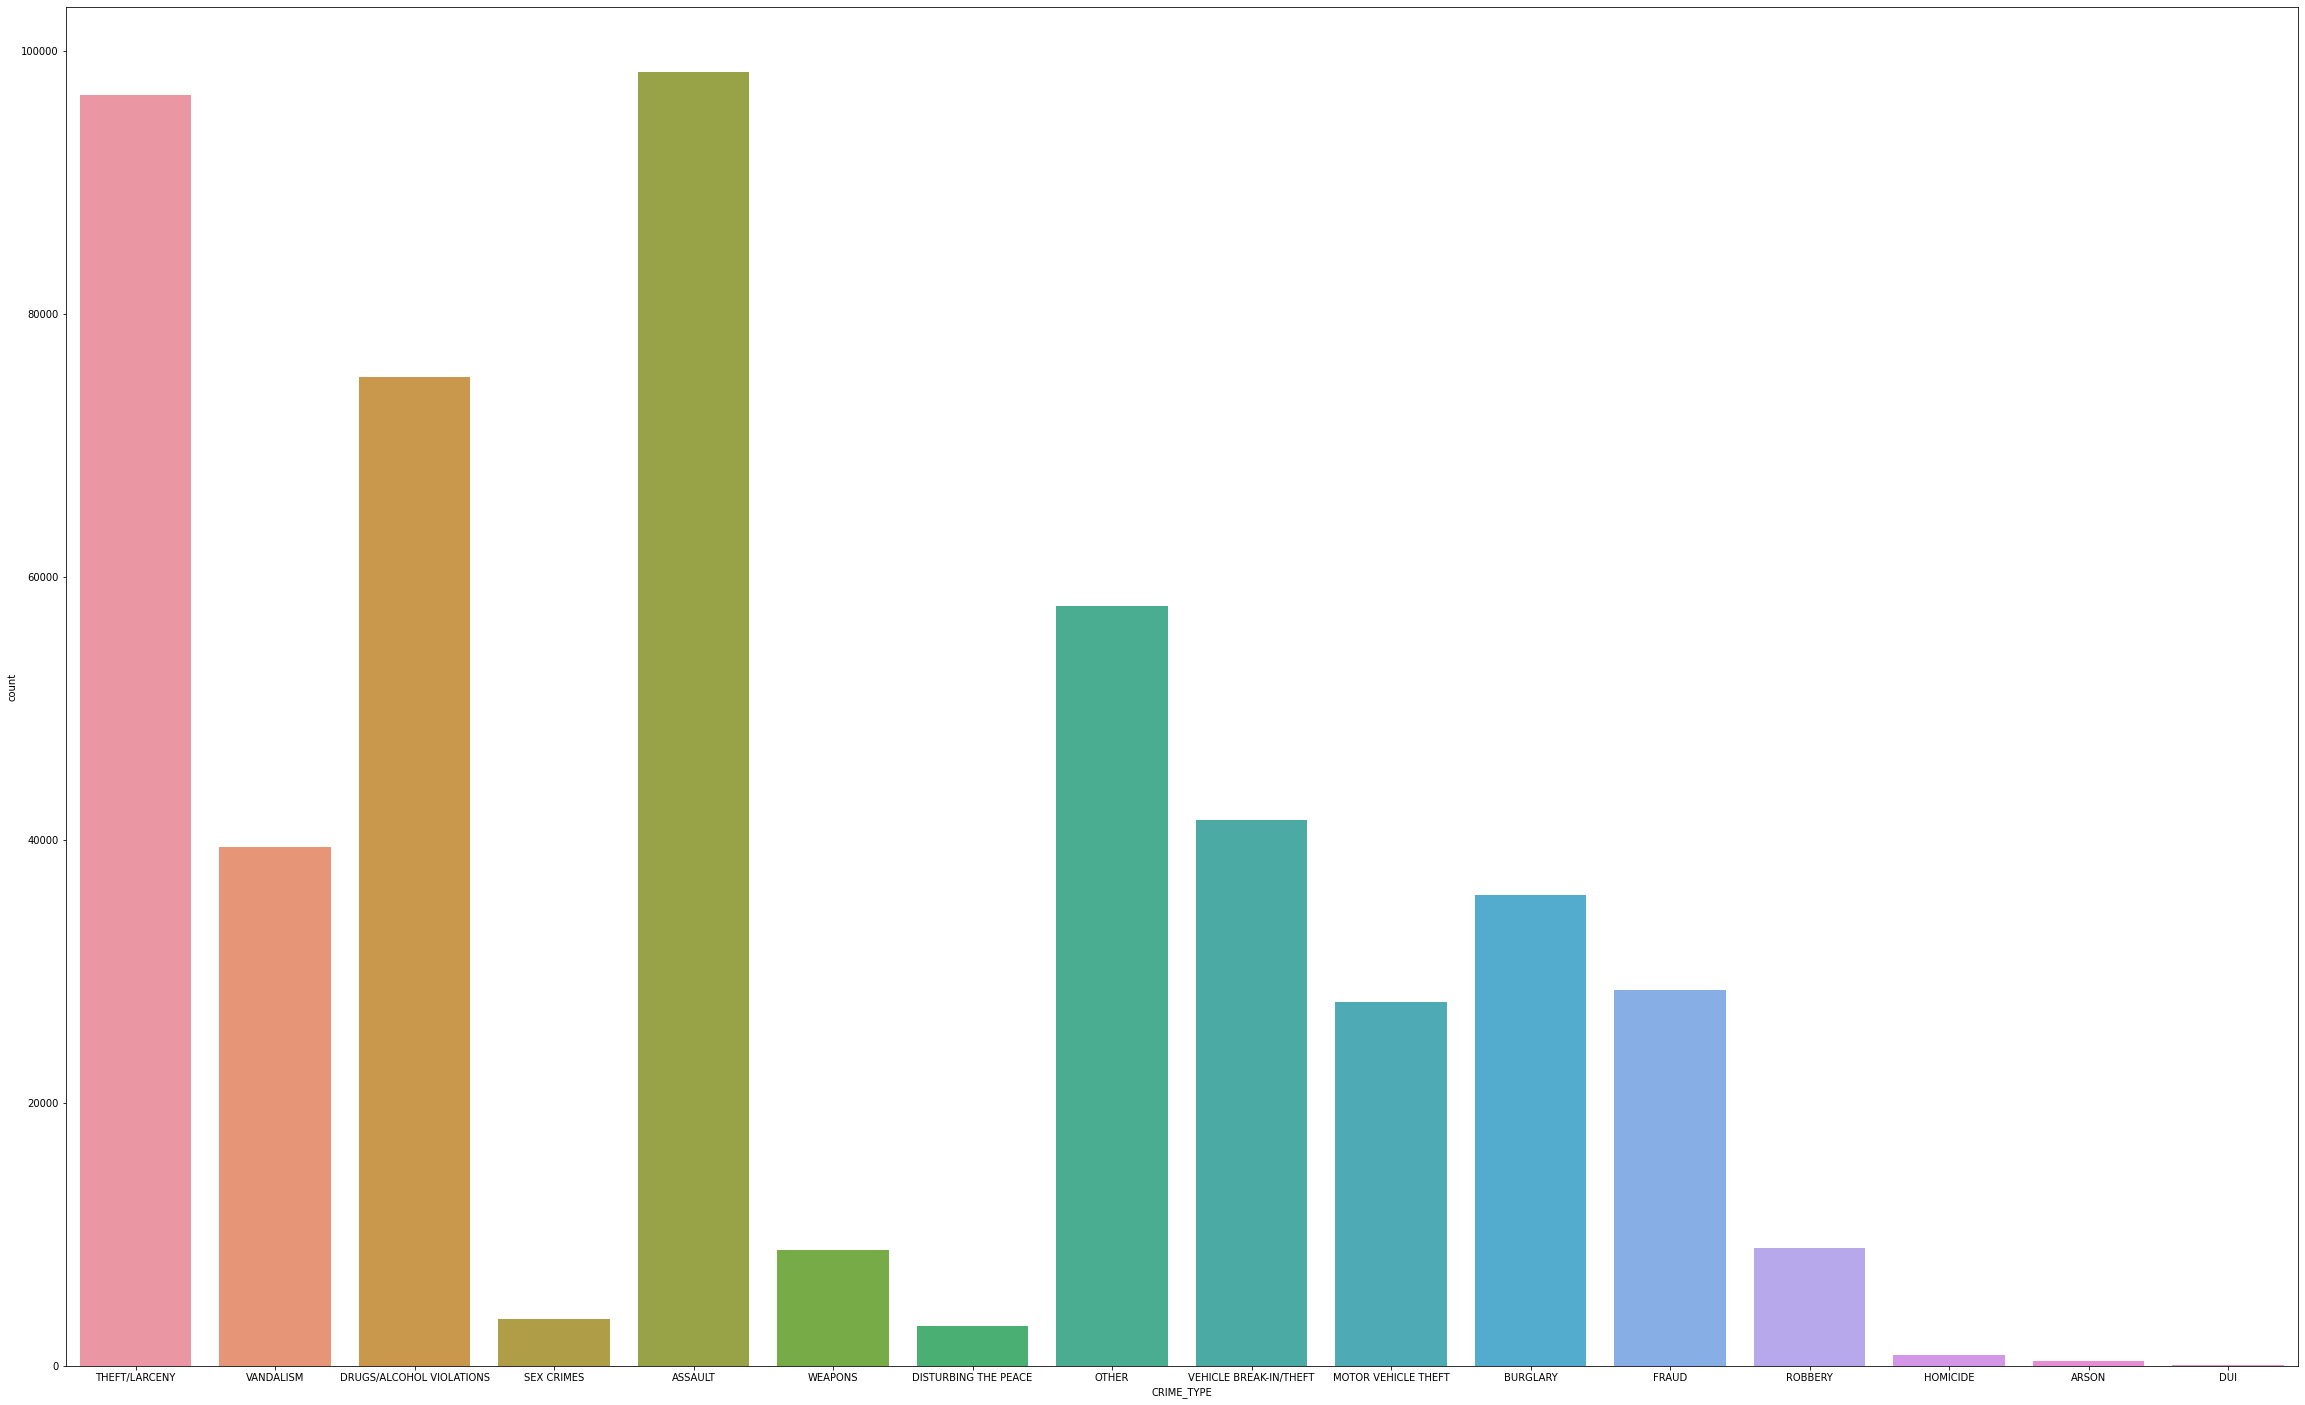

In [ ]:
plt.figure(figsize=(40,25))

sns.countplot(crimes['CRIME_TYPE'])

In [ ]:
crimes['ZIP_CODE'].describe()

count     523636.0
unique       181.0
top        40214.0
freq       23656.0
Name: ZIP_CODE, dtype: float64

In [ ]:
temp = crimes['ZIP_CODE']==40214.0
cs = crimes[temp]
cs

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
65541,80-15-083593,2015-10-16 14:44:00,2015-10-16 14:44:00,DRUG PARAPHERNALIA - BUY/POSSESS,DRUGS/ALCOHOL VIOLATIONS,35B,PART II,COMPLETED,3RD DIVISION,323,HIGHWAY / ROAD / ALLEY,NATIONAL TPKE / OUTER LOOP ...,LOUISVILLE,40214,1114206
65543,80-15-083336,2015-10-15 18:55:00,2015-10-15 18:55:00,TBUT OR DISP SHOPLIFTING < $500,THEFT/LARCENY,23C,PART I,COMPLETED,3RD DIVISION,323,DEPARTMENT / DISCOUNT STORE,100 BLOCK OUTER LOOP ...,LOUISVILLE,40214,1114208
65548,80-15-084992,2015-09-25 17:26:00,2015-09-25 00:01:00,HARASSMENT (NO PHYSICAL CONTACT),ASSAULT,13C,PART II,COMPLETED,4TH DIVISION,436,RESIDENCE / HOME,500 BLOCK FORUM AVE ...,LOUISVILLE,40214,1114213
65549,80-15-084928,2015-10-21 00:55:00,2015-10-21 00:55:00,DRUG PARAPHERNALIA - BUY/POSSESS,DRUGS/ALCOHOL VIOLATIONS,35B,PART II,COMPLETED,3RD DIVISION,322,RESIDENCE / HOME,5300 BLOCK ROLLINGWOOD TRL ...,LOUISVILLE,40214,1114214
65556,80-15-085015,2015-10-21 12:17:00,2015-10-21 11:50:00,TBUT OR DISP SHOPLIFTING < $500,THEFT/LARCENY,23C,PART I,COMPLETED,3RD DIVISION,323,DEPARTMENT / DISCOUNT STORE,100 BLOCK OUTER LOOP ...,LOUISVILLE,40214,1114221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200303,80-20-030535,2020-05-24 17:46:00,2020-05-24 14:00:00,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,COMPLETED,3RD DIVISION,322,RESIDENCE / HOME,7400 BLOCK PAIUTE RD ...,LOUISVILLE,40214,1312029
200348,80-21-012413,2021-03-05 13:30:00,2021-03-05 12:40:00,WANTON ENDANGERMENT-1ST DEGREE,ASSAULT,13A,PART I,COMPLETED,3RD DIVISION,322,HIGHWAY / ROAD / ALLEY,SOUTHSIDE DR / STRAWBERRY LN ...,LOUISVILLE,40214,1312074
200364,80-21-012489,2021-03-06 11:36:21,2021-03-06 10:33:21,THEFT OF PROPERTY LOST/MISLAID/DELIVERED BY MI...,THEFT/LARCENY,23H,PART I,COMPLETED,3RD DIVISION,322,BANK / SAVINGS & LOAN,5500 BLOCK NEW CUT RD ...,LOUISVILLE,40214,1312090
200409,80-21-012801,2021-03-08 06:12:13,2021-03-06 22:30:00,TBUT OR DISP PARTS FROM VEHICLE $500 OR > BUT ...,VEHICLE BREAK-IN/THEFT,23G,PART I,COMPLETED,3RD DIVISION,323,PARKING LOT / GARAGE,7400 BLOCK CRANFILL WAY ...,LOUISVILLE,40214,1312135


# **Decrease or increasing crimes**

In [ ]:
crime_1.groupby('CRIME_TYPE').describe()

ID                ...                       
                            count          mean  ...         75%        max
CRIME_TYPE                                       ...                       
ARSON                         4.0  1.033054e+06  ...  1033695.25  1095883.0
ASSAULT                   13388.0  1.071366e+06  ...  1109245.25  1307739.0
BURGLARY                   6418.0  1.071345e+06  ...  1104804.50  1238887.0
DISTURBING THE PEACE        548.0  1.073462e+06  ...  1111729.25  1265925.0
DRUGS/ALCOHOL VIOLATIONS  14281.0  1.068811e+06  ...  1109942.00  1255470.0
DUI                           3.0  1.017652e+06  ...  1028820.50  1058033.0
FRAUD                      4433.0  1.071508e+06  ...  1108785.00  1294333.0
HOMICIDE                     88.0  1.078275e+06  ...  1124360.50  1235026.0
MOTOR VEHICLE THEFT        3234.0  1.074112e+06  ...  1110242.00  1280549.0
OTHER                      8145.0  1.072192e+06  ...  1110702.00  1290587.0
ROBBERY                    1575.0  1.072595e+06  ...  1111105.50  1278909.0
SEX CRIMES                  585.0  1.057830e+06  ...  1112677.00  1313080.0
THEFT/LARCENY             15738.0  1.068328e+06  ...  1103979.25  1317720.0
VANDALISM                  5462.0  1.071137e+06  ...  1109905.00  1251305.0
VEHICLE BREAK-IN/THEFT     4767.0  1.072435e+06  ...  1110022.50  1161121.0
WEAPONS                    1170.0  1.070658e+06  ...  1112783.00  1217991.0

[16 rows x 8 columns]

In [ ]:
crime_5.groupby('CRIME_TYPE').describe()

ID                ...                       
                            count          mean  ...         75%        max
CRIME_TYPE                                       ...                       
ARSON                       365.0  1.019448e+06  ...  1259216.00  1310317.0
ASSAULT                   43527.0  8.308944e+05  ...  1105735.00  1312162.0
BURGLARY                  12853.0  8.527539e+05  ...  1106523.00  1312139.0
DISTURBING THE PEACE       1162.0  8.402484e+05  ...  1070702.75  1311925.0
DRUGS/ALCOHOL VIOLATIONS  18010.0  7.925394e+05  ...   980101.25  1312156.0
DUI                           7.0  8.719861e+05  ...  1031110.00  1222500.0
FRAUD                     10799.0  7.798064e+05  ...  1056819.00  1312159.0
HOMICIDE                    432.0  8.354476e+05  ...  1139617.50  1311656.0
MOTOR VEHICLE THEFT       12088.0  8.589686e+05  ...  1122021.25  1312134.0
OTHER                     24558.0  8.285011e+05  ...  1106273.50  1312144.0
ROBBERY                    3338.0  8.541341e+05  ...  1121802.00  1312125.0
SEX CRIMES                 1385.0  8.122417e+05  ...  1033824.00  1311961.0
THEFT/LARCENY             34456.0  8.333127e+05  ...  1068189.50  1312124.0
VANDALISM                 16366.0  8.378788e+05  ...  1106407.25  1312158.0
VEHICLE BREAK-IN/THEFT    18221.0  8.505357e+05  ...  1106244.00  1312148.0
WEAPONS                    2870.0  7.975266e+05  ...  1032690.50  1311957.0

[16 rows x 8 columns]

## **ALL Datas**

### **ASSAULT**

In [ ]:
temp = crime_1['CRIME_TYPE'] == 'ASSAULT'
assault1 = crime_1[temp]
l1 = len(assault1)

temp = crime_2['CRIME_TYPE'] == 'ASSAULT'
assault2 = crime_2[temp]
l2 = len(assault2)

temp = crime_3['CRIME_TYPE'] == 'ASSAULT'
assault3 = crime_3[temp]
l3 = len(assault3)

temp = crime_4['CRIME_TYPE'] == 'ASSAULT'
assault4 = crime_4[temp]
l4 = len(assault4)

temp = crime_5['CRIME_TYPE'] == 'ASSAULT'
assault5 = crime_5[temp]
l5 = len(assault5)
l5

43527

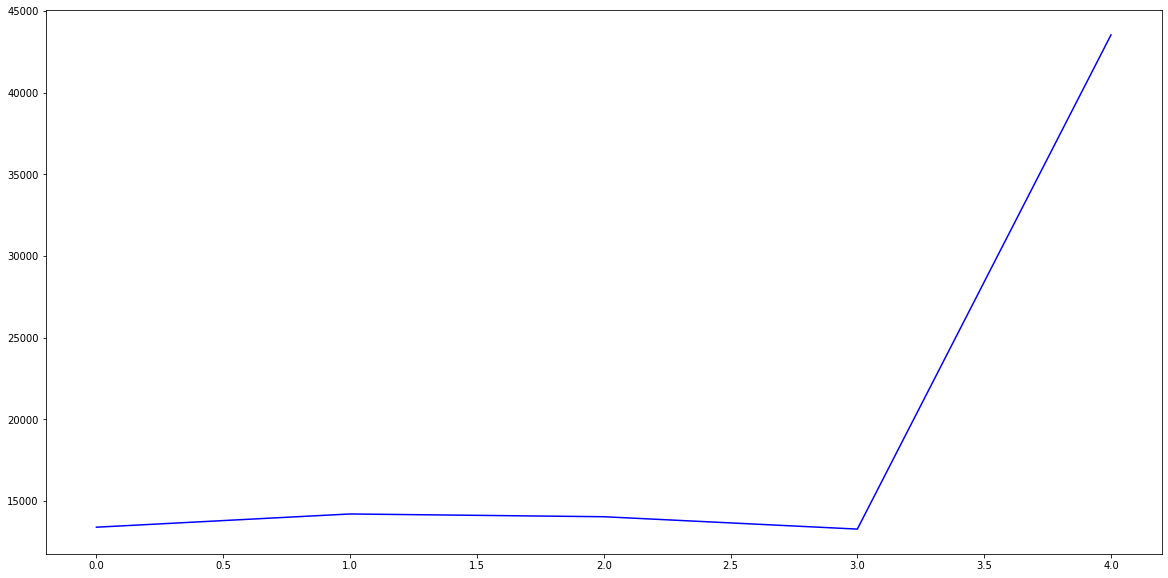

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=[l1,l2,l3,l4,l5], color="blue")

### **DISTURBING THE PEACE**

In [ ]:
temp = crime_1['CRIME_TYPE'] == 'DISTURBING THE PEACE'
PEACE1 = crime_1[temp]
l1 = len(PEACE1)

temp = crime_2['CRIME_TYPE'] == 'DISTURBING THE PEACE'
PEACE2 = crime_2[temp]
l2 = len(PEACE2)

temp = crime_3['CRIME_TYPE'] == 'DISTURBING THE PEACE'
PEACE3 = crime_3[temp]
l3 = len(PEACE3)

temp = crime_4['CRIME_TYPE'] == 'DISTURBING THE PEACE'
PEACE4 = crime_4[temp]
l4 = len(PEACE4)

temp = crime_5['CRIME_TYPE'] == 'DISTURBING THE PEACE'
PEACE5 = crime_5[temp]
l5 = len(PEACE5)
l5

1162

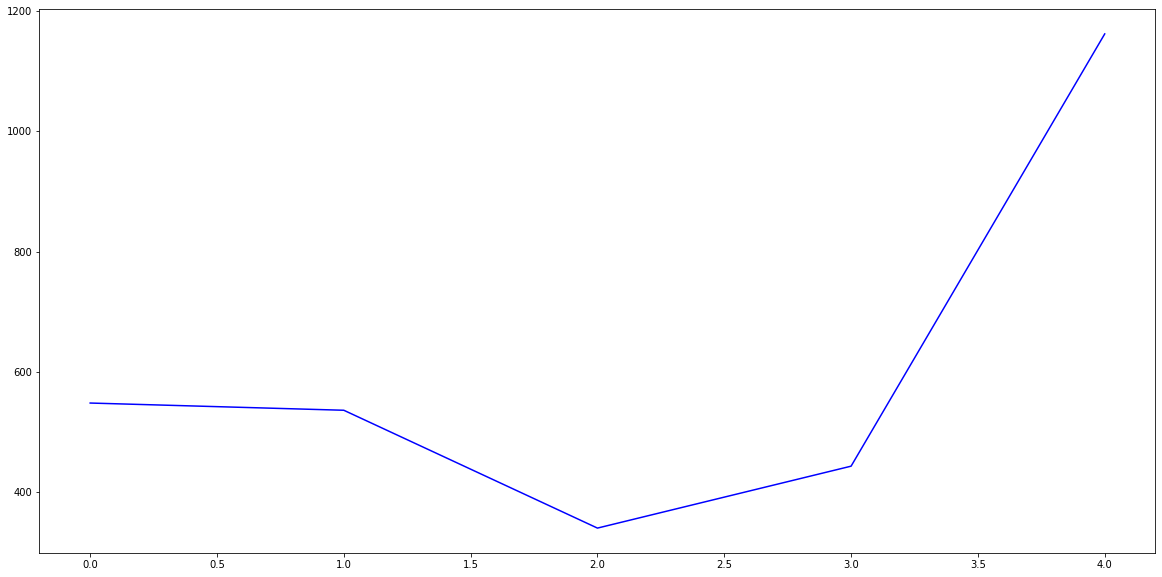

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=[l1,l2,l3,l4,l5] , color="blue")

## **RATIO**

### **DISTURBING THE PEACE**

In [ ]:
temp = crime_1['CRIME_TYPE'] == 'DISTURBING THE PEACE'
PEACE1 = crime_1[temp]
l1 = len(PEACE1)/len(crime_1)

temp = crime_2['CRIME_TYPE'] == 'DISTURBING THE PEACE'
PEACE2 = crime_2[temp]
l2 = len(PEACE2)/len(crime_2)

temp = crime_3['CRIME_TYPE'] == 'DISTURBING THE PEACE'
PEACE3 = crime_3[temp]
l3 = len(PEACE3)/len(crime_3)

temp = crime_4['CRIME_TYPE'] == 'DISTURBING THE PEACE'
PEACE4 = crime_4[temp]
l4 = len(PEACE4)/len(crime_4)

temp = crime_5['CRIME_TYPE'] == 'DISTURBING THE PEACE'
PEACE5 = crime_5[temp]
l5 = len(PEACE5)/len(crime_5)
l5

0.00579733282777132

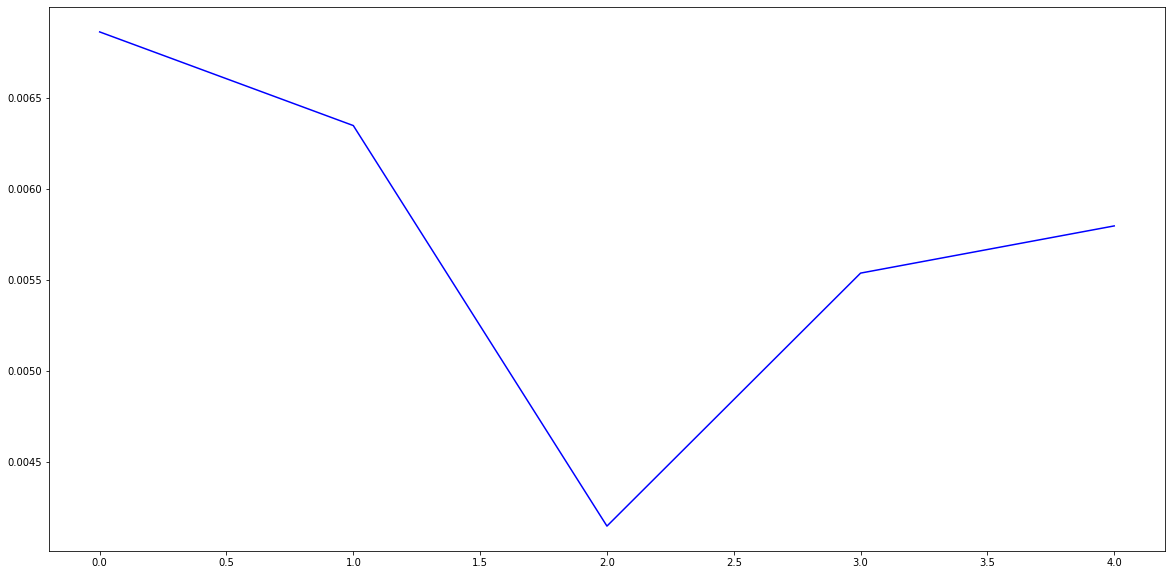

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=[l1,l2,l3,l4,l5] , color="blue")

### **ROBBERY**

In [ ]:
temp = crime_1['CRIME_TYPE'] == 'ROBBERY'
ROBBERY1 = crime_1[temp]
l1 = len(ROBBERY1)/len(crime_1)

temp = crime_2['CRIME_TYPE'] == 'ROBBERY'
ROBBERY2 = crime_2[temp]
l2 = len(ROBBERY2)/len(crime_2)

temp = crime_3['CRIME_TYPE'] == 'ROBBERY'
ROBBERY3 = crime_3[temp]
l3 = len(ROBBERY3)/len(crime_3)

temp = crime_4['CRIME_TYPE'] == 'ROBBERY'
ROBBERY4 = crime_4[temp]
l4 = len(ROBBERY4)/len(crime_4)

temp = crime_5['CRIME_TYPE'] == 'ROBBERY'
ROBBERY5 = crime_5[temp]
l5 = len(ROBBERY5)/len(crime_5)
l5

0.016653611858090073

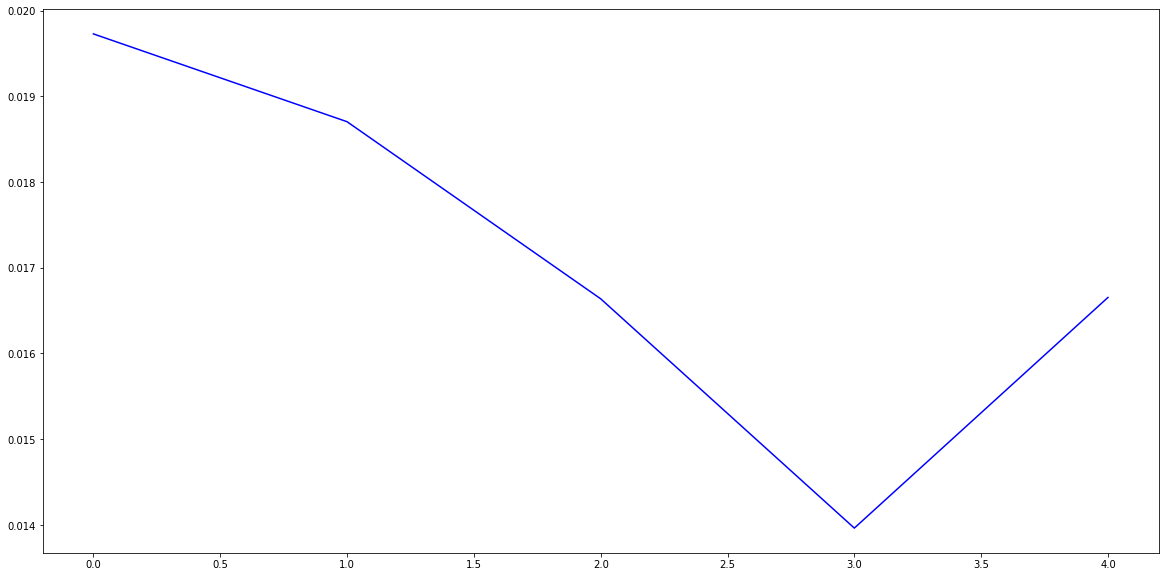

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=[l1,l2,l3,l4,l5] , color="blue")

### **Assault**

In [ ]:
temp = crime_1['CRIME_TYPE'] == 'ASSAULT'
ASSAULT1 = crime_1[temp]
l1 = len(ASSAULT1)/len(crime_1)

temp = crime_2['CRIME_TYPE'] == 'ASSAULT'
ASSAULT2 = crime_2[temp]
l2 = len(ASSAULT2)/len(crime_2)

temp = crime_3['CRIME_TYPE'] == 'ASSAULT'
ASSAULT3 = crime_3[temp]
l3 = len(ASSAULT3)/len(crime_3)

temp = crime_4['CRIME_TYPE'] == 'ASSAULT'
ASSAULT4 = crime_4[temp]
l4 = len(ASSAULT4)/len(crime_4)

temp = crime_5['CRIME_TYPE'] == 'ASSAULT'
ASSAULT5 = crime_5[temp]
l5 = len(ASSAULT5)/len(crime_5)
l5

0.21716050429810863

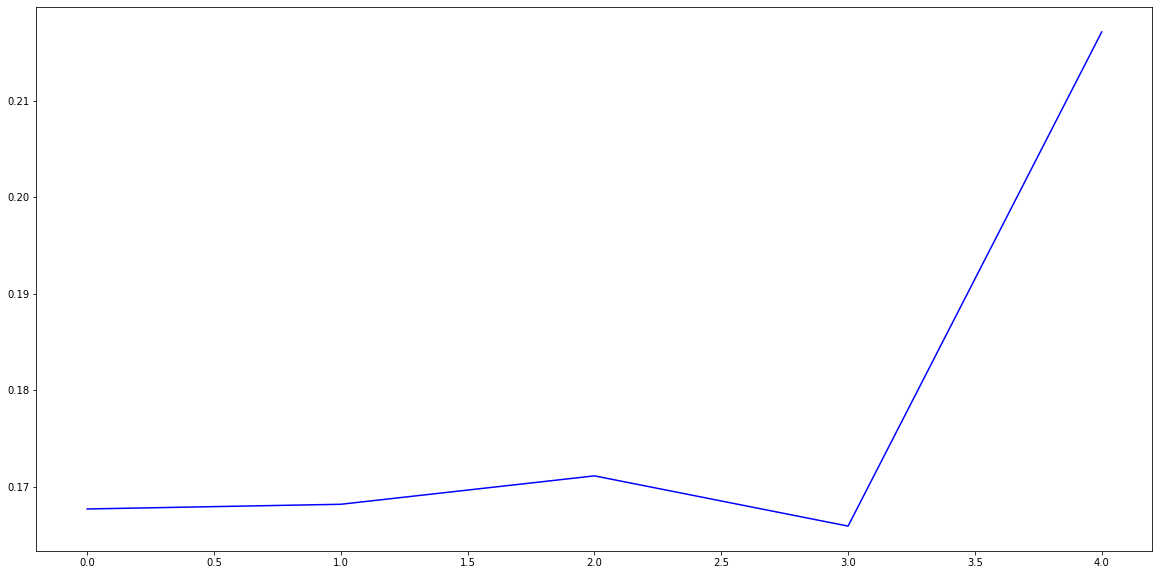

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=[l1,l2,l3,l4,l5] , color="blue")

### **VEHICLE BREAK-IN/THEFT**

In [ ]:
temp = crime_1['CRIME_TYPE'] == 'VEHICLE BREAK-IN/THEFT'
BREAK1 = crime_1[temp]
l1 = len(BREAK1)/len(crime_1)

temp = crime_2['CRIME_TYPE'] == 'VEHICLE BREAK-IN/THEFT'
BREAK2 = crime_2[temp]
l2 = len(BREAK2)/len(crime_2)

temp = crime_3['CRIME_TYPE'] == 'VEHICLE BREAK-IN/THEFT'
BREAK3 = crime_3[temp]
l3 = len(BREAK3)/len(crime_3)

temp = crime_4['CRIME_TYPE'] == 'VEHICLE BREAK-IN/THEFT'
BREAK4 = crime_4[temp]
l4 = len(BREAK4)/len(crime_4)

temp = crime_5['CRIME_TYPE'] == 'VEHICLE BREAK-IN/THEFT'
BREAK5 = crime_5[temp]
l5 = len(BREAK5)/len(crime_5)
l5

0.09090636958246232

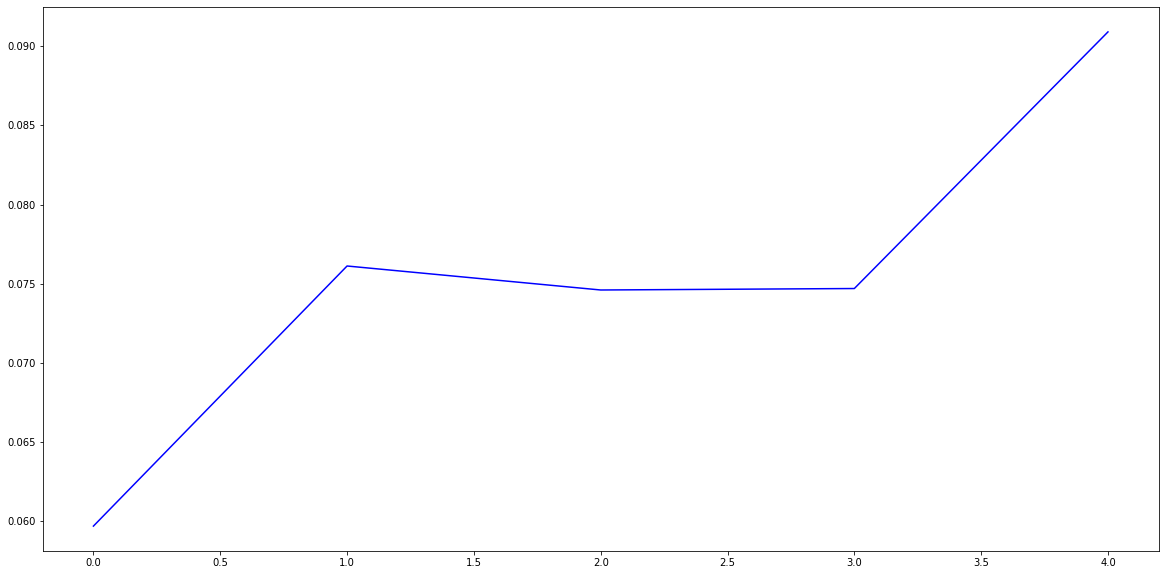

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=[l1,l2,l3,l4,l5] , color="blue")

### **WEAPONS**

In [ ]:
temp = crime_1['CRIME_TYPE'] == 'WEAPONS'
WEAPONS1 = crime_1[temp]
l1 = len(WEAPONS1)/len(crime_1)

temp = crime_2['CRIME_TYPE'] == 'WEAPONS'
WEAPONS2 = crime_2[temp]
l2 = len(WEAPONS2)/len(crime_2)

temp = crime_3['CRIME_TYPE'] == 'WEAPONS'
WEAPONS3 = crime_3[temp]
l3 = len(WEAPONS3)/len(crime_3)

temp = crime_4['CRIME_TYPE'] == 'WEAPONS'
WEAPONS4 = crime_4[temp]
l4 = len(WEAPONS4)/len(crime_4)

temp = crime_5['CRIME_TYPE'] == 'WEAPONS'
WEAPONS5 = crime_5[temp]
l5 = len(WEAPONS5)/len(crime_5)
l5

0.014318713610760488

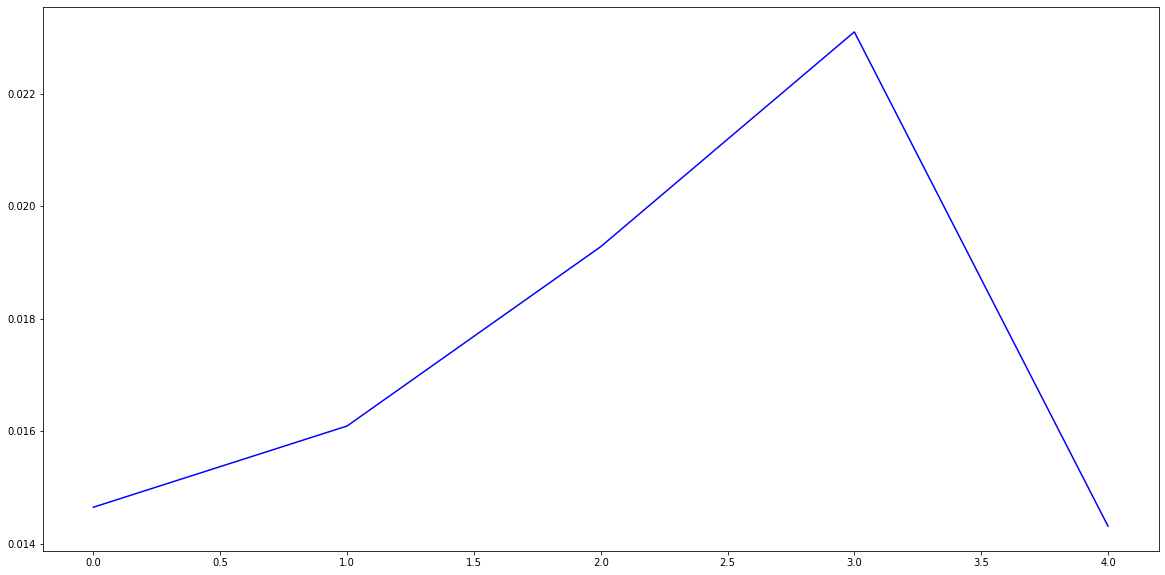

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=[l1,l2,l3,l4,l5] , color="blue")

# **Date**

In [5]:
#because this index is NAT-null
crime_5.loc[56657,'DATE_OCCURED'] = "2019-02-06 03:47:00"
crime_5.loc[56657]

INCIDENT_NUMBER                                         80-19-009326
DATE_REPORTED                                    2019-02-06 03:47:00
DATE_OCCURED                                     2019-02-06 03:47:00
UOR_DESC                              WANTON ENDANGERMENT-2ND DEGREE
CRIME_TYPE                                                   ASSAULT
NIBRS_CODE                                                       13C
UCR_HIERARCHY                                                PART II
ATT_COMP                                                   COMPLETED
LMPD_DIVISION                                           8TH DIVISION
LMPD_BEAT                                                        811
PREMISE_TYPE                       OTHER RESIDENCE (APARTMENT/CONDO)
BLOCK_ADDRESS      10400 BLOCK SOUTHERN MEADOWS DR               ...
CITY                                                      LOUISVILLE
ZIP_CODE                                                       40241
ID                                

In [7]:
crime_5['DATE_OCCURED'] = pd.to_datetime(crime_5['DATE_OCCURED'])
crime_5['DATE_REPORTED'] = pd.to_datetime(crime_5['DATE_REPORTED'])
##x.loc[0,'DATE_REPORTED'].day_name()

In [ ]:
crime_5['taken'] = 0
for i in range (len(crime_5)):
   tem = []
   temp = str(crime_5.loc[i,'DATE_REPORTED'] - crime_5.loc[i,'DATE_OCCURED'])
   tem = temp.split(" ")
   crime_5.loc[i,'taken'] = int(tem[0])

0 days 00:10:00


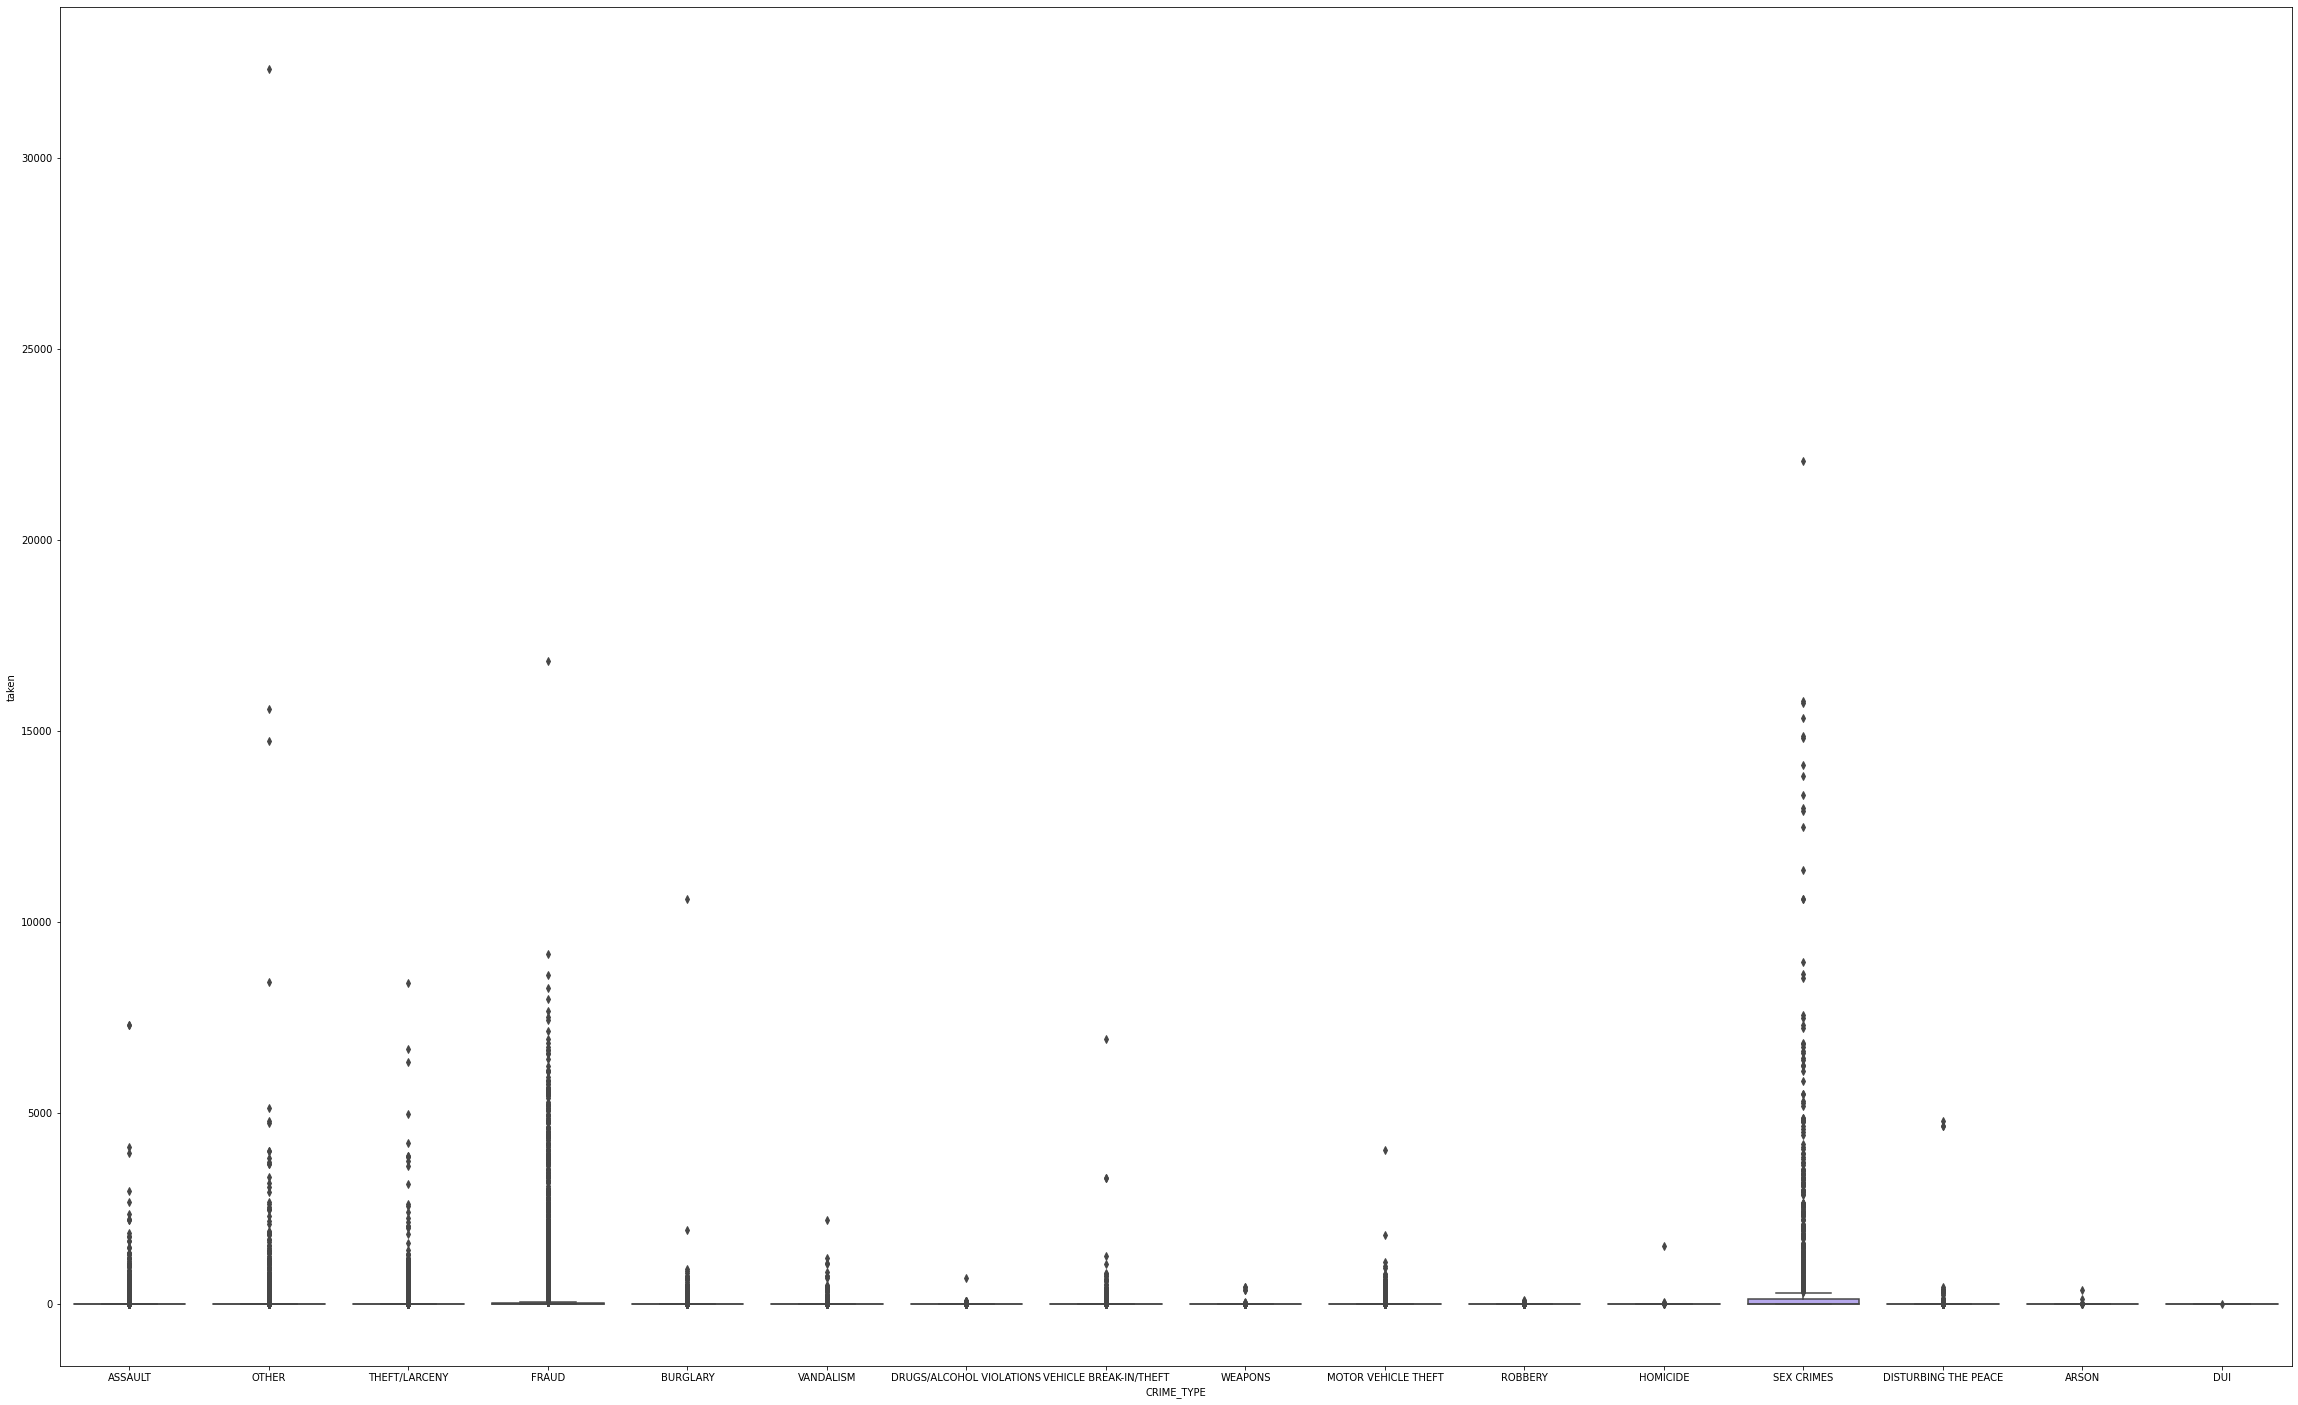

In [ ]:
plt.figure(figsize=(40,25))

sns.boxplot(x='CRIME_TYPE',y='taken' , data = crime_5)

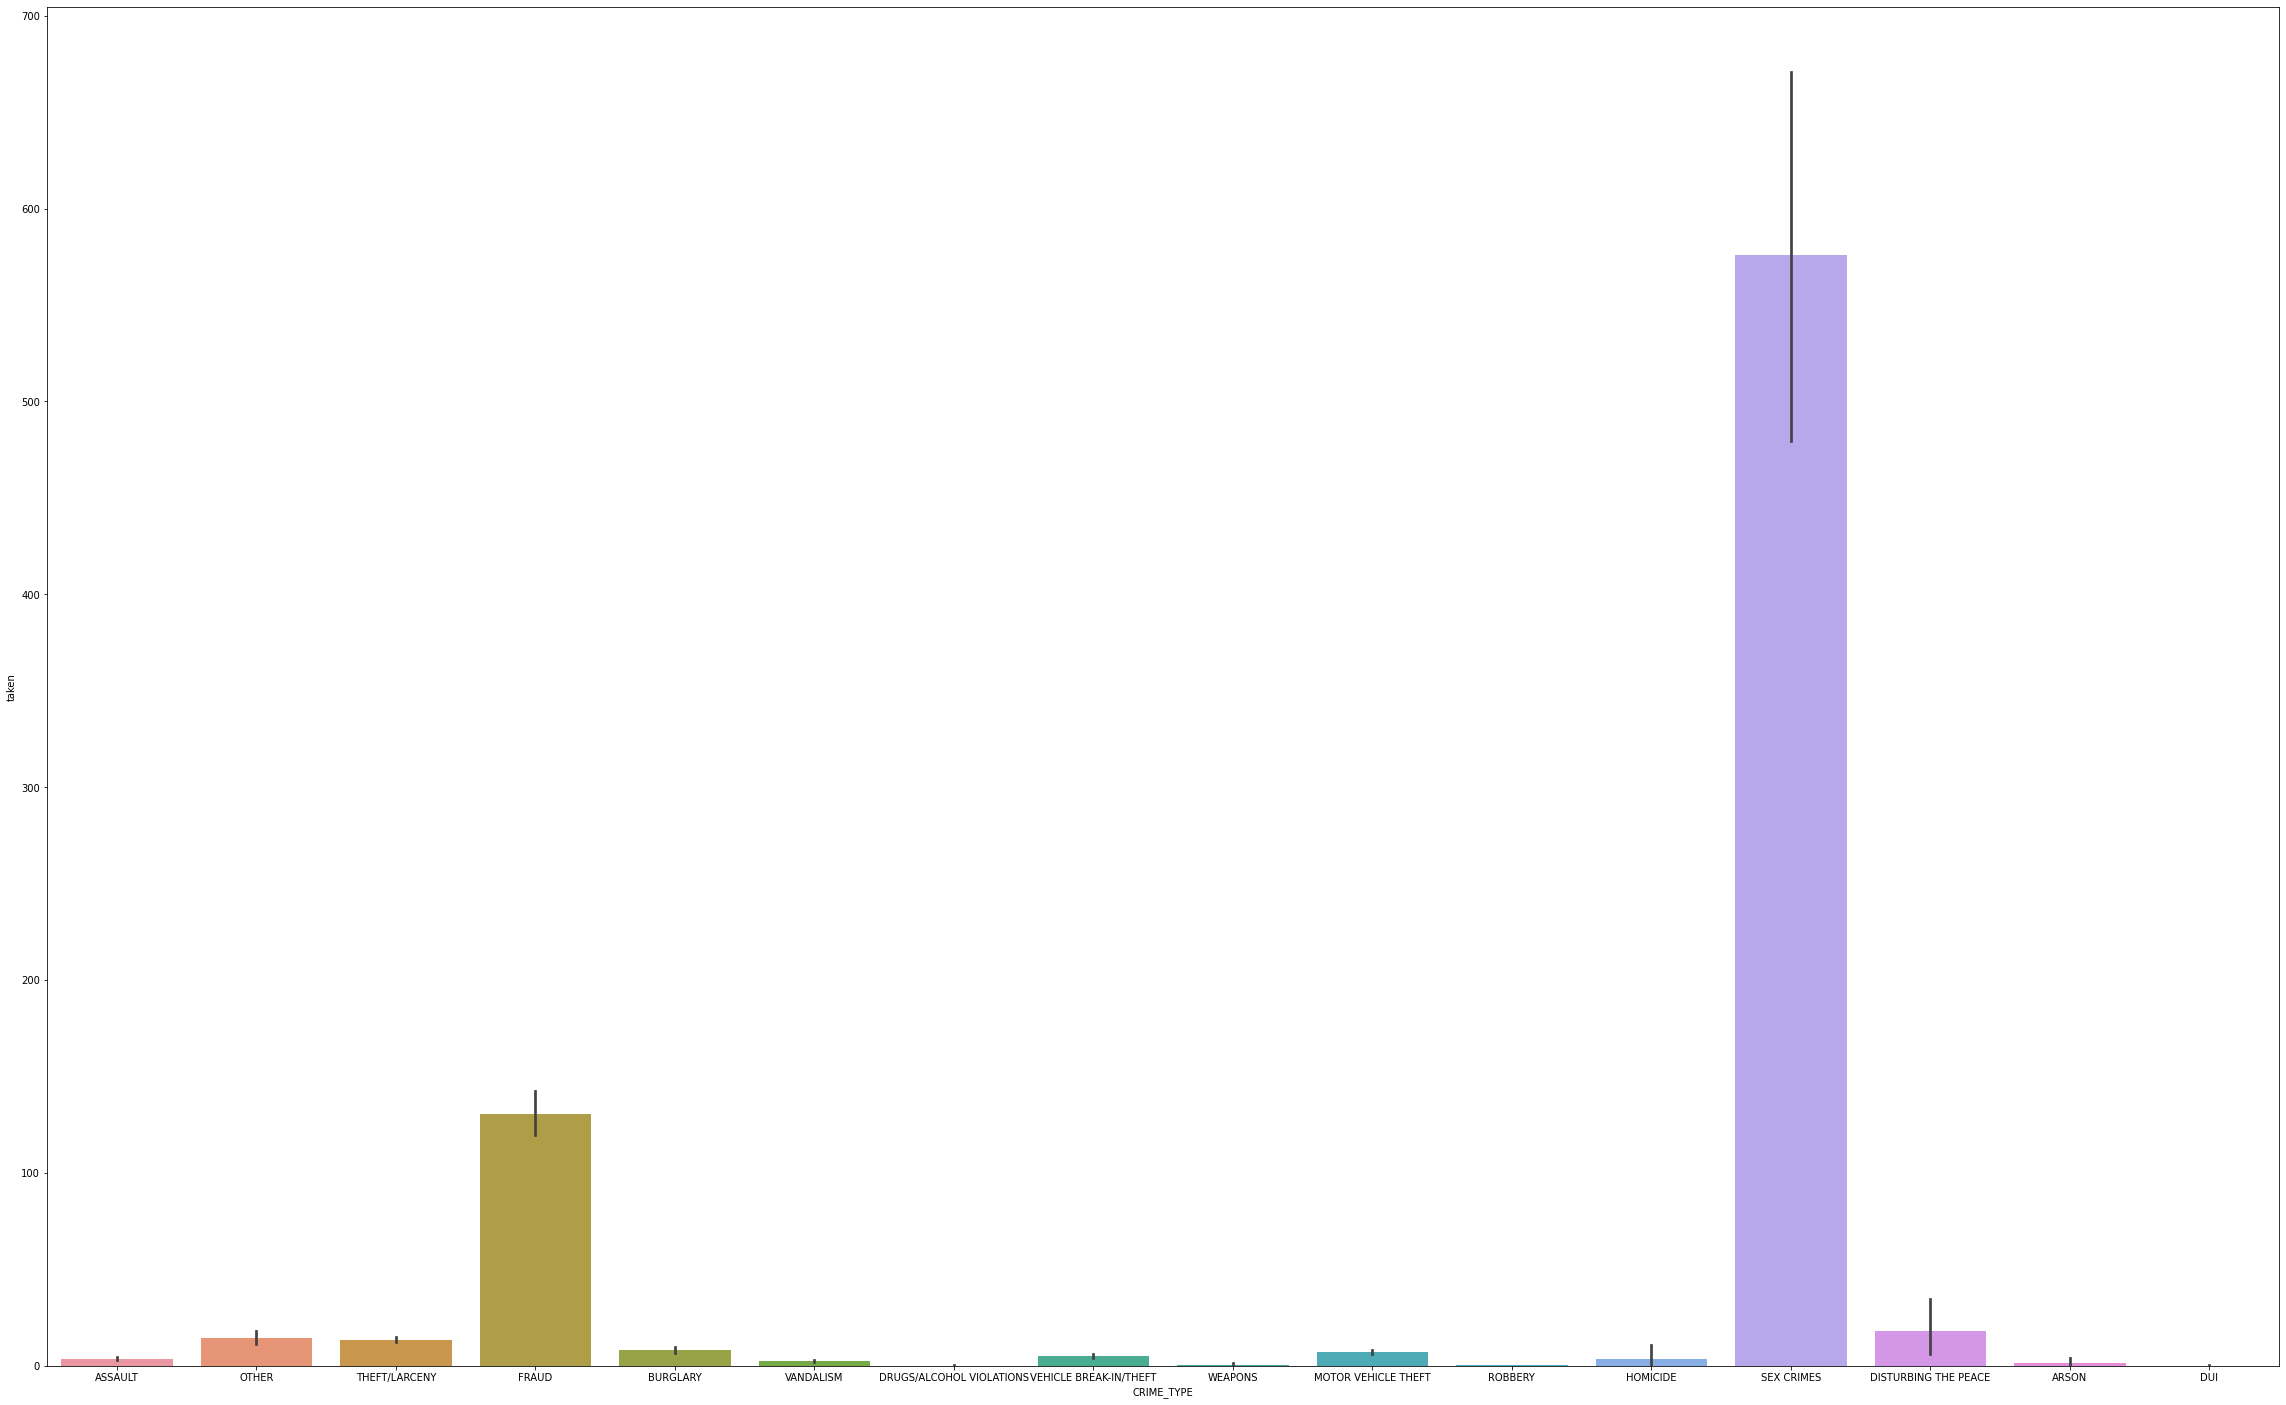

In [ ]:
plt.figure(figsize=(40,25))

sns.barplot(x='CRIME_TYPE',y='taken' , data = crime_5)

# **DAY**

In [ ]:
crime_5['day'] = ""
crime_5

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID,taken,day
0,80-21-011027,2021-02-26 15:51:00,2021-02-26 15:14:00,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,ASSAULT,13B,PART II,COMPLETED,1ST DIVISION,111,RESIDENCE / HOME,2900 BLOCK ALFORD AVE ...,LOUISVILLE,40212,13278,0,
1,80-21-012203,2021-03-04 14:14:00,2021-03-04 14:00:00,VIOLATION OF KENTUCKY EPO/DVO,ASSAULT,90F,PART II,COMPLETED,6TH DIVISION,613,RESIDENCE / HOME,2000 BLOCK PEABODY LN ...,LOUISVILLE,40218,13279,0,
2,80-21-012025,2021-03-03 17:33:00,2021-03-03 17:33:00,VIOLATION OF KENTUCKY EPO/DVO,ASSAULT,90F,PART II,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,8300 BLOCK GLOXINIA DR ...,LOUISVILLE,40258,13280,0,
3,80-21-012384,2021-03-05 22:32:00,2021-02-19 16:00:00,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,1ST DIVISION,111,RESIDENCE / HOME,3600 BLOCK RUDD AVE ...,LOUISVILLE,40212,13281,14,
4,80-21-500293,2021-03-05 23:40:00,2021-02-18 23:00:00,ANY NON CRIMINAL CHARGE NOT COVERED BY THESE C...,OTHER,90Z,PART II,COMPLETED,4TH DIVISION,411,RESIDENCE / HOME,900 BLOCK S 6TH ST ...,LOUISVILLE,40203,13282,15,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200432,80-21-012369,2021-03-05 20:22:29,2021-03-03 21:00:00,CRIMINAL MISCHIEF-2ND DEGREE,VANDALISM,290,PART II,COMPLETED,5TH DIVISION,521,RESIDENCE / HOME,600 BLOCK EMILY RD ...,LOUISVILLE,40206,1312158,1,
200433,80-21-012370,2021-03-05 20:32:35,2021-02-20 15:00:00,THEFT BY FAIL TO MAKE REQ DISPOSITION OF PROP ...,FRAUD,26A,PART II,COMPLETED,5TH DIVISION,513,RENTAL / STORAGE FACILITY,2100 BLOCK BARDSTOWN RD ...,LOUISVILLE,40205,1312159,13,
200434,80-21-011835,2021-03-02 17:27:00,2021-03-02 17:13:00,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,ASSAULT,13B,PART II,COMPLETED,4TH DIVISION,423,RESIDENCE / HOME,900 BLOCK CAMDEN AVE ...,LOUISVILLE,40215,1312160,0,
200435,80-21-011883,2021-03-03 00:47:00,2021-03-03 00:47:00,VIOLATION OF KENTUCKY EPO/DVO,ASSAULT,90F,PART II,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,800 BLOCK MULBERRY ST ...,LOUISVILLE,40217,1312161,0,


In [ ]:
for i in range (len(crime_5)):
   crime_5.loc[i,'day'] = crime_5.loc[i,'DATE_OCCURED'].day_name()

In [ ]:
crime_5

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID,taken,day
0,80-21-011027,2021-02-26 15:51:00,2021-02-26 15:14:00,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,ASSAULT,13B,PART II,COMPLETED,1ST DIVISION,111,RESIDENCE / HOME,2900 BLOCK ALFORD AVE ...,LOUISVILLE,40212,13278,0,Friday
1,80-21-012203,2021-03-04 14:14:00,2021-03-04 14:00:00,VIOLATION OF KENTUCKY EPO/DVO,ASSAULT,90F,PART II,COMPLETED,6TH DIVISION,613,RESIDENCE / HOME,2000 BLOCK PEABODY LN ...,LOUISVILLE,40218,13279,0,Thursday
2,80-21-012025,2021-03-03 17:33:00,2021-03-03 17:33:00,VIOLATION OF KENTUCKY EPO/DVO,ASSAULT,90F,PART II,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,8300 BLOCK GLOXINIA DR ...,LOUISVILLE,40258,13280,0,Wednesday
3,80-21-012384,2021-03-05 22:32:00,2021-02-19 16:00:00,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,1ST DIVISION,111,RESIDENCE / HOME,3600 BLOCK RUDD AVE ...,LOUISVILLE,40212,13281,14,Friday
4,80-21-500293,2021-03-05 23:40:00,2021-02-18 23:00:00,ANY NON CRIMINAL CHARGE NOT COVERED BY THESE C...,OTHER,90Z,PART II,COMPLETED,4TH DIVISION,411,RESIDENCE / HOME,900 BLOCK S 6TH ST ...,LOUISVILLE,40203,13282,15,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200432,80-21-012369,2021-03-05 20:22:29,2021-03-03 21:00:00,CRIMINAL MISCHIEF-2ND DEGREE,VANDALISM,290,PART II,COMPLETED,5TH DIVISION,521,RESIDENCE / HOME,600 BLOCK EMILY RD ...,LOUISVILLE,40206,1312158,1,Wednesday
200433,80-21-012370,2021-03-05 20:32:35,2021-02-20 15:00:00,THEFT BY FAIL TO MAKE REQ DISPOSITION OF PROP ...,FRAUD,26A,PART II,COMPLETED,5TH DIVISION,513,RENTAL / STORAGE FACILITY,2100 BLOCK BARDSTOWN RD ...,LOUISVILLE,40205,1312159,13,Saturday
200434,80-21-011835,2021-03-02 17:27:00,2021-03-02 17:13:00,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,ASSAULT,13B,PART II,COMPLETED,4TH DIVISION,423,RESIDENCE / HOME,900 BLOCK CAMDEN AVE ...,LOUISVILLE,40215,1312160,0,Tuesday
200435,80-21-011883,2021-03-03 00:47:00,2021-03-03 00:47:00,VIOLATION OF KENTUCKY EPO/DVO,ASSAULT,90F,PART II,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,800 BLOCK MULBERRY ST ...,LOUISVILLE,40217,1312161,0,Wednesday


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


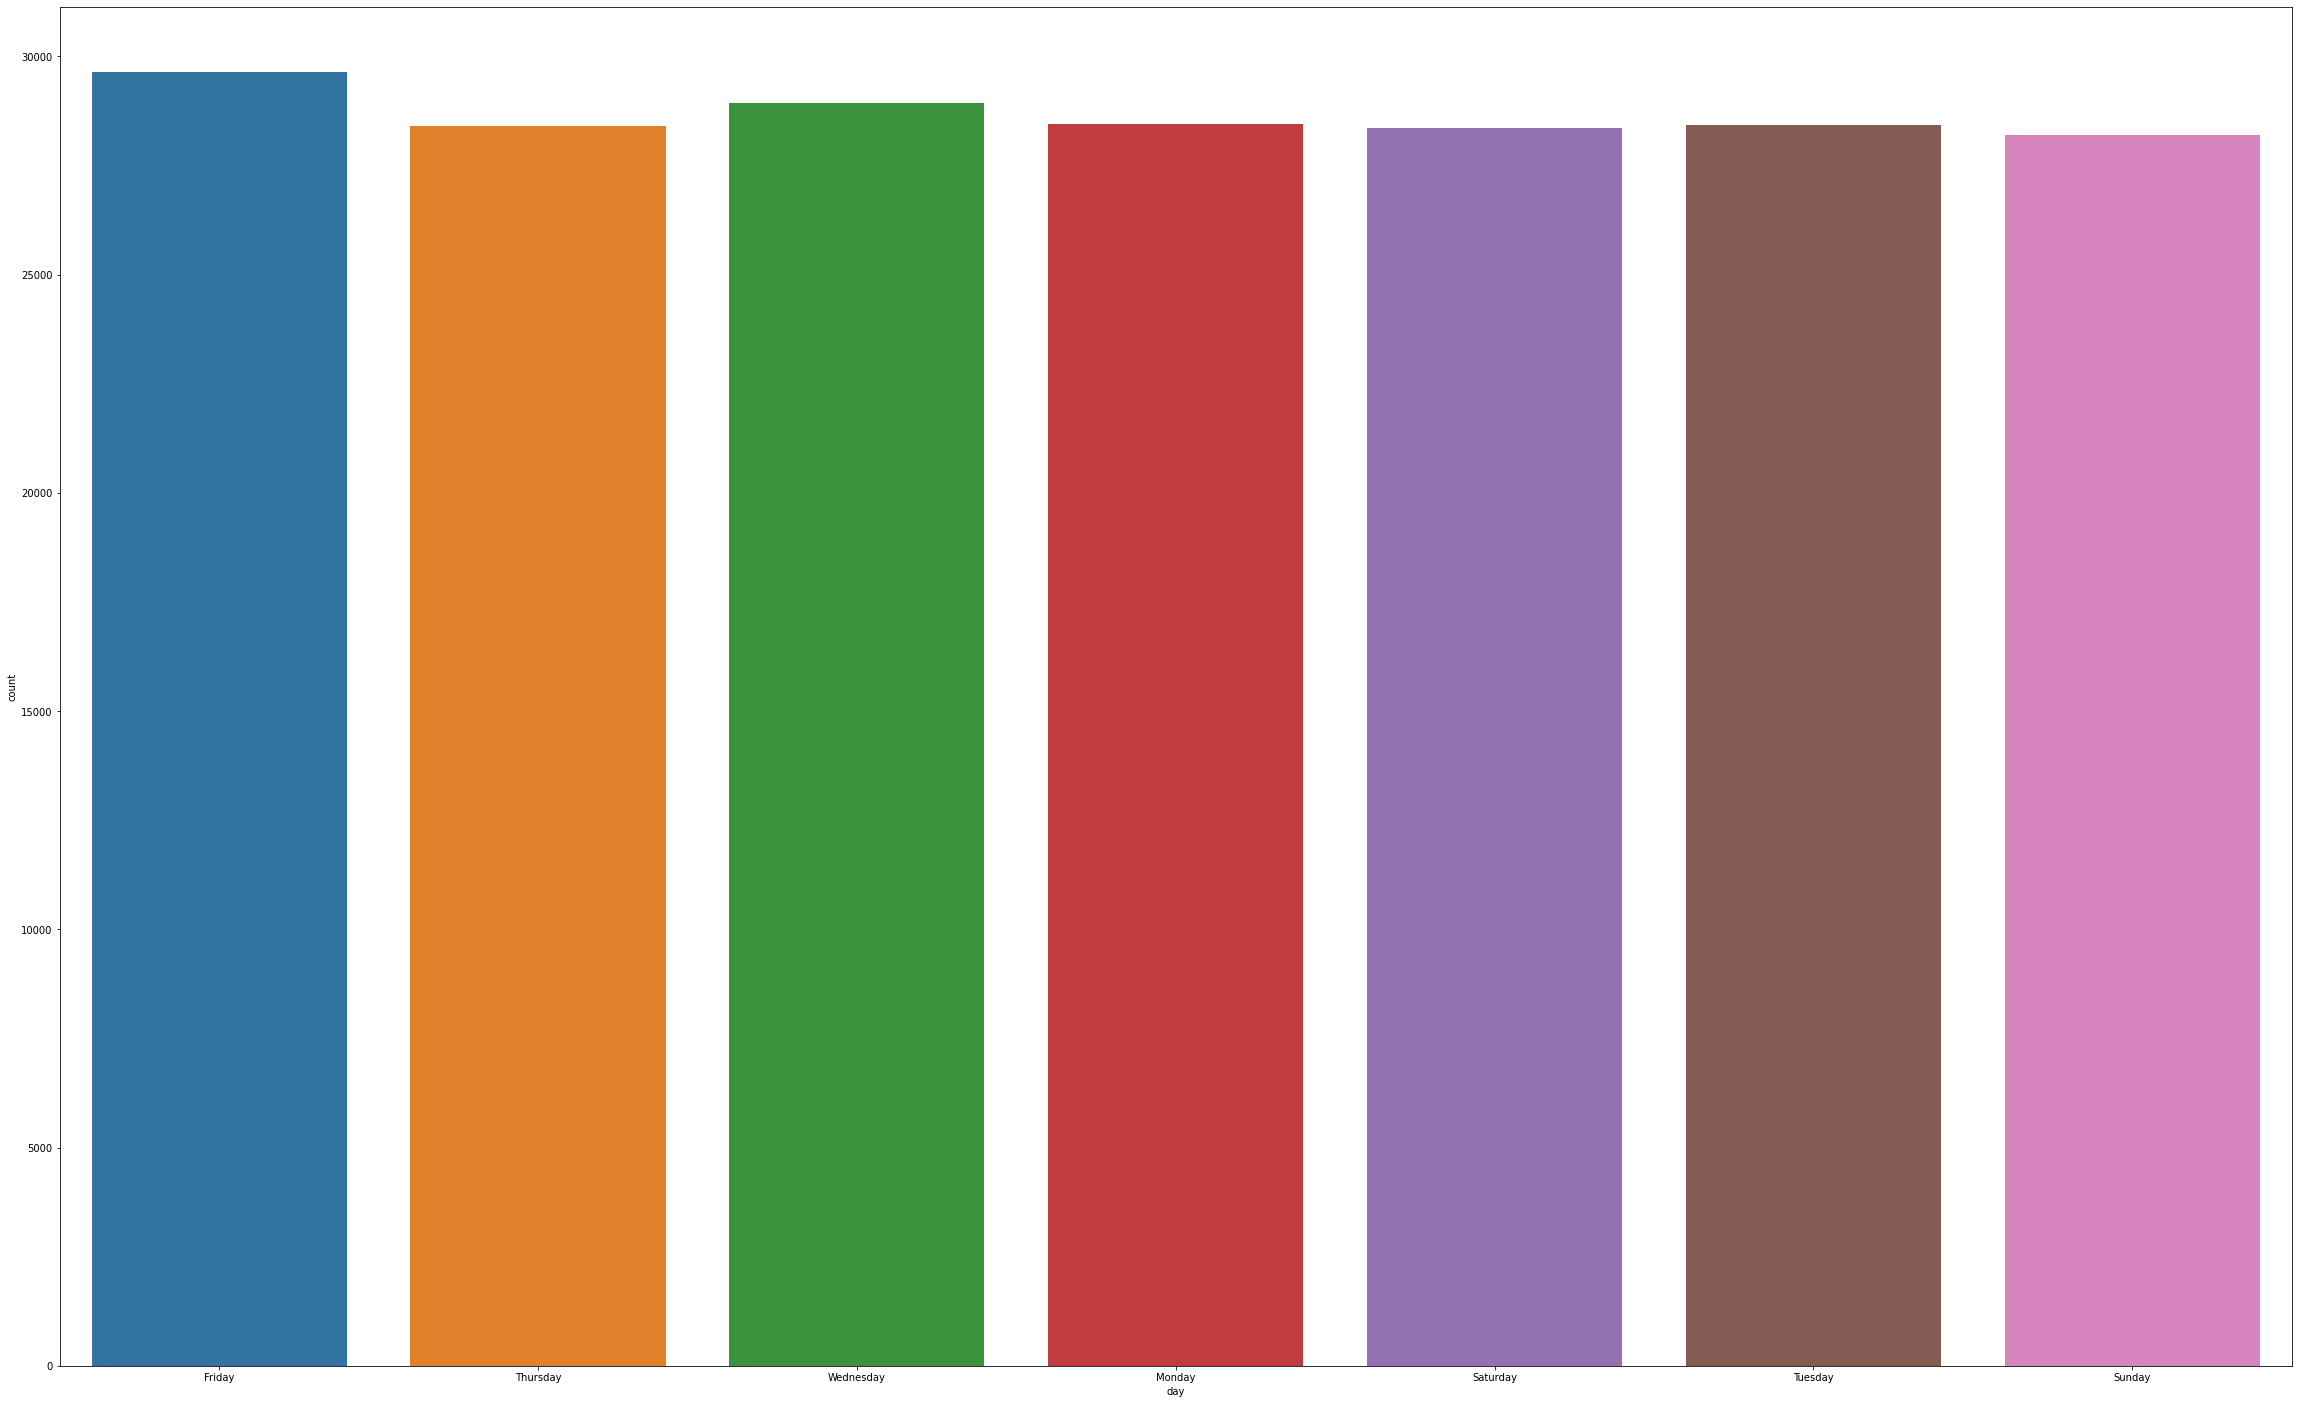

In [ ]:
plt.figure(figsize=(40,25))

sns.countplot('day', data = crime_5)

## **DRUGS/ALCOHOL VIOLATIONS**

In [ ]:
temp = crime_5['CRIME_TYPE'] == 'DRUGS/ALCOHOL VIOLATIONS'
crime_x = crime_5[temp]
crime_x

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID,taken,day
40,80-20-038571,2020-06-30 13:03:00,2020-06-30 13:03:00,POSS CONT SUB-1ST DEGREE-1ST OFFENSE-DRUG UNSP...,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,5TH DIVISION,521,OTHER RESIDENCE (APARTMENT/CONDO),2600 BLOCK LINDSAY AVE ...,LOUISVILLE,40206,13318,0,Tuesday
76,80-21-012561,2021-03-06 03:15:00,2021-03-06 03:15:00,POSS OF MARIJUANA,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,5TH DIVISION,513,HIGHWAY / ROAD / ALLEY,BARDSTOWN RD / PRINCETON DR ...,LOUISVILLE,40205,13354,0,Saturday
322,80-21-012045,2021-03-03 19:24:00,2021-03-03 19:15:00,DRUG PARAPHERNALIA - BUY/POSSESS,DRUGS/ALCOHOL VIOLATIONS,35B,PART II,COMPLETED,4TH DIVISION,411,HIGHWAY / ROAD / ALLEY,S FLOYD ST / E ORMSBY AVE ...,LOUISVILLE,40203,13601,0,Wednesday
388,80-21-011496,2021-03-01 04:30:00,2021-03-01 04:30:00,POSS CONT SUB-1ST DEGREE-1ST OFFENSE-COCAINE,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,1ST DIVISION,111,HIGHWAY / ROAD / ALLEY,N 22ND ST / LYTLE ST ...,LOUISVILLE,40203,13667,0,Monday
389,80-21-011496,2021-03-01 04:30:00,2021-03-01 04:30:00,POSS CONTROLLED SUB 1ST DEGREE 1ST OFF (METHAM...,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,1ST DIVISION,111,HIGHWAY / ROAD / ALLEY,N 22ND ST / LYTLE ST ...,LOUISVILLE,40203,13668,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200423,80-21-011492,2021-03-01 04:07:00,2021-03-01 04:07:00,POSS OF MARIJUANA,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,DIXIE HWY / OSAGE AVE ...,LOUISVILLE,40210,1312149,0,Monday
200425,80-21-011806,2021-03-02 15:10:00,2021-03-02 15:01:00,POSS OF MARIJUANA,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,6TH DIVISION,613,OTHER RESIDENCE (APARTMENT/CONDO),3200 BLOCK GOLDEN TURTLE CIR ...,LOUISVILLE,40218,1312151,0,Tuesday
200428,80-21-011817,2021-03-02 15:50:00,2021-03-02 15:50:00,POSS CONTROLLED SUB 1ST DEGREE 2ND OFF (METHAM...,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,3RD DIVISION,322,RESIDENCE / HOME,ALPINE WAY / WESTHALL AVE ...,LOUISVILLE,40214,1312154,0,Tuesday
200429,80-21-011758,2021-03-02 10:24:00,2021-03-02 10:24:00,POSS OF MARIJUANA,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,4TH DIVISION,412,HIGHWAY / ROAD / ALLEY,EASTERN PKY / S SHELBY ST ...,LOUISVILLE,40217,1312155,0,Tuesday


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


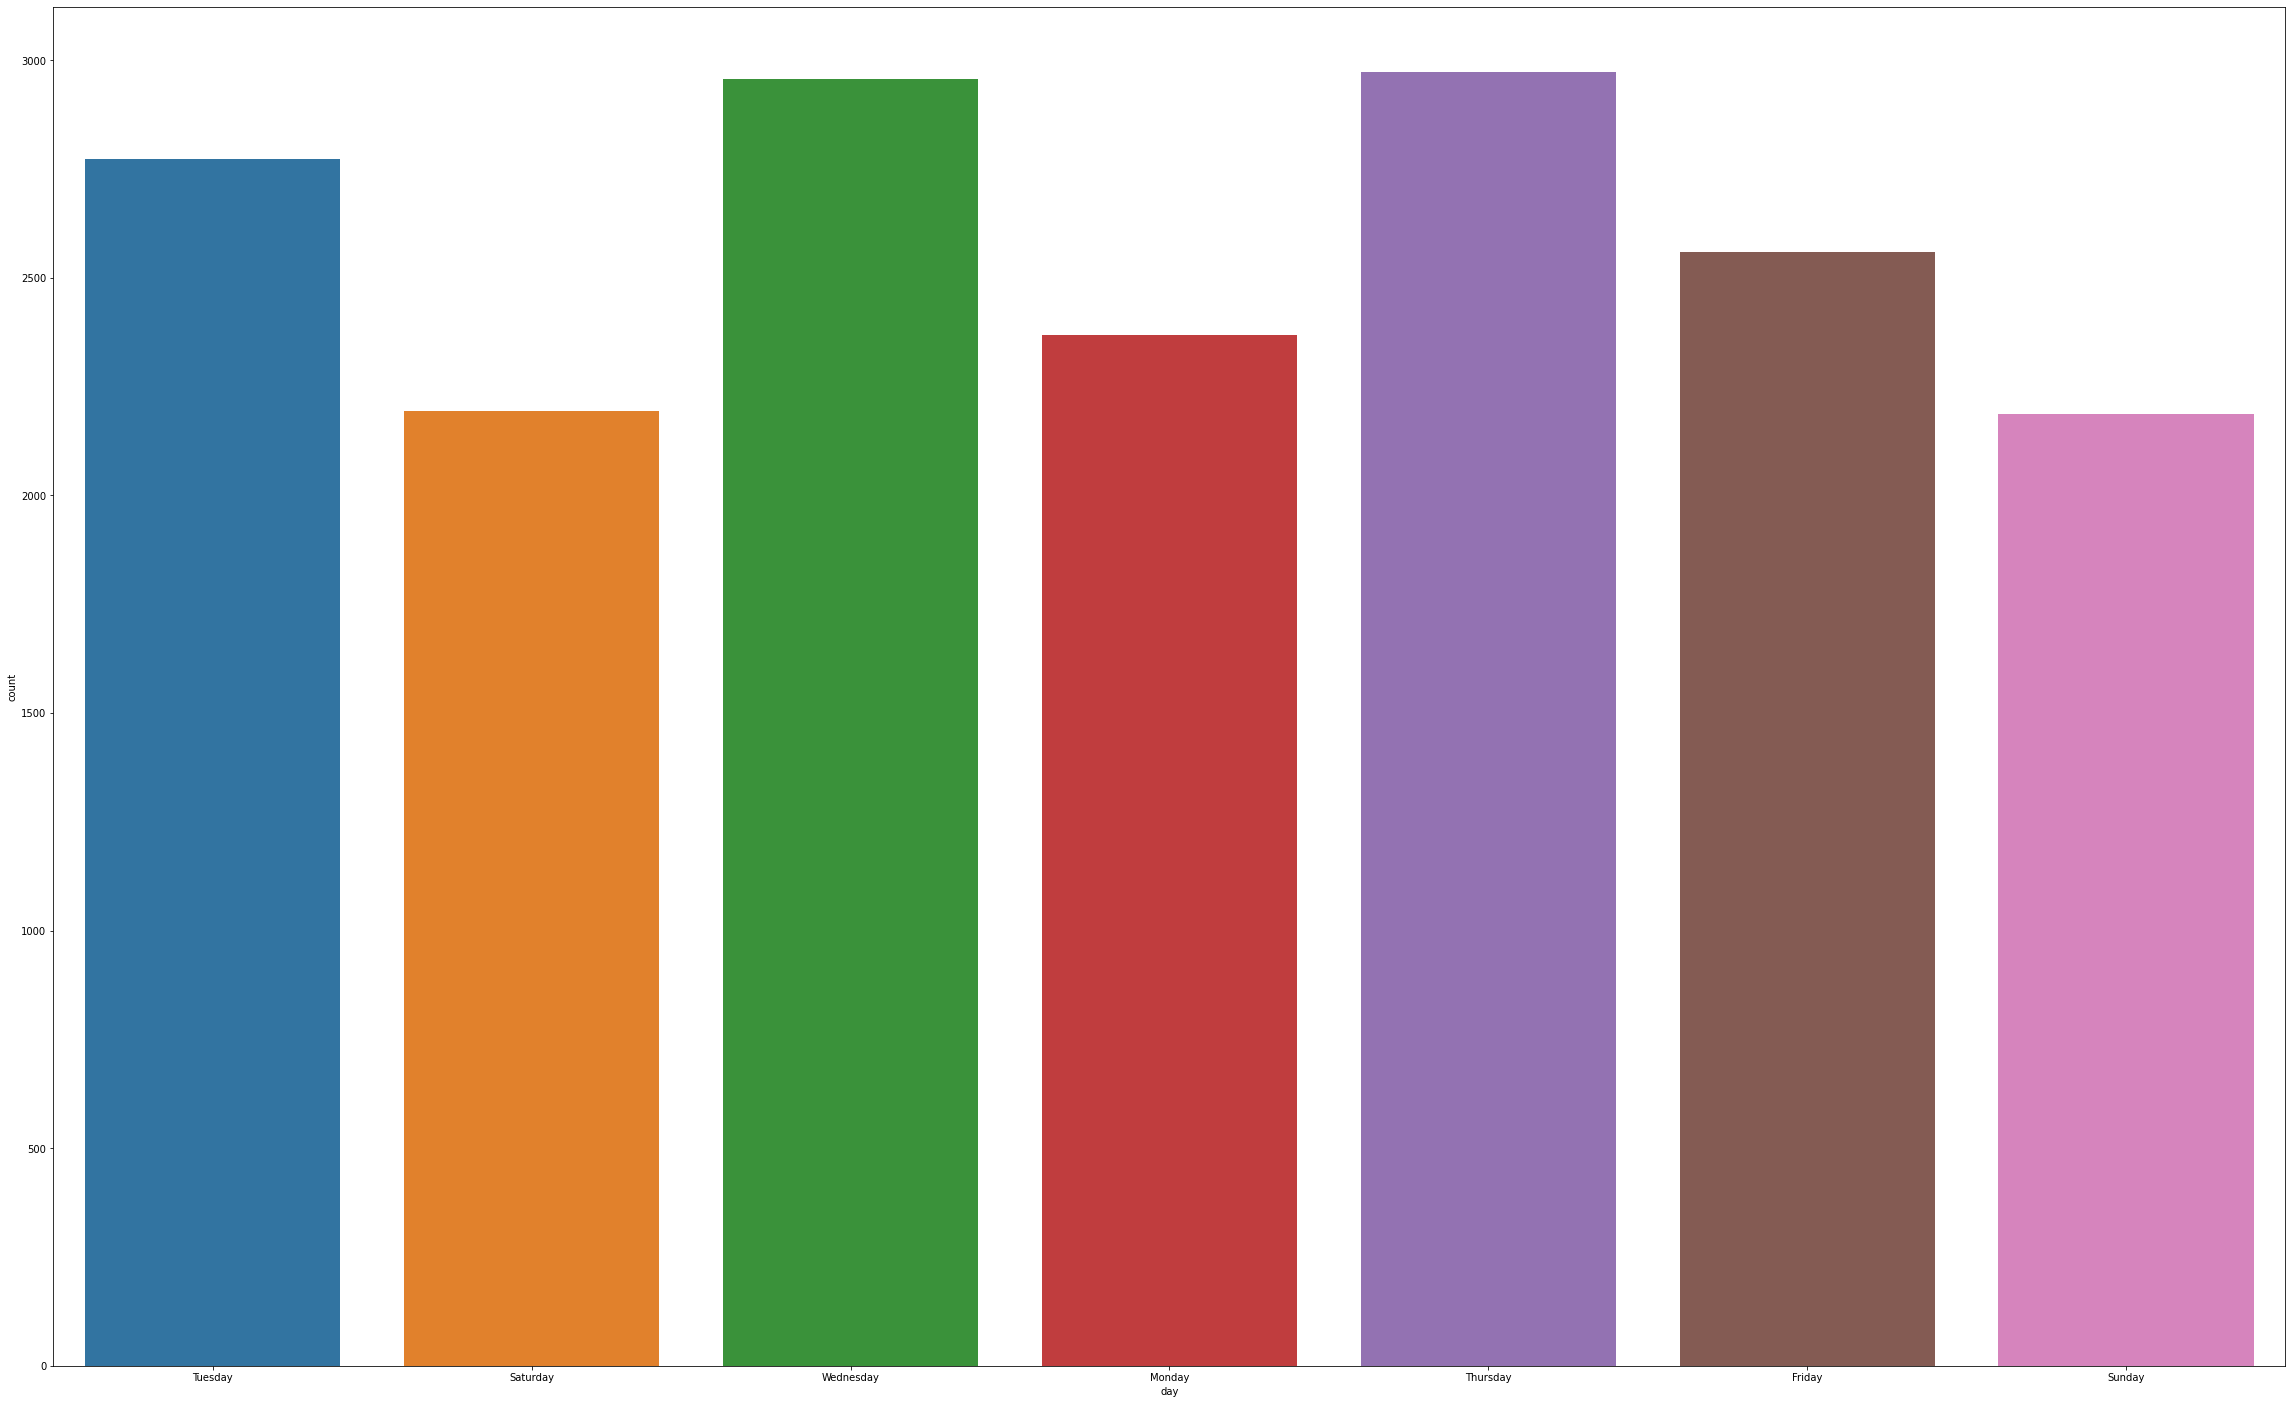

In [ ]:
plt.figure(figsize=(40,25))

sns.countplot('day', data = crime_x)

## **HOMICIDE**

In [ ]:
temp = crime_5['CRIME_TYPE'] == 'HOMICIDE'
crime_x = crime_5[temp]
len(crime_x)

432

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


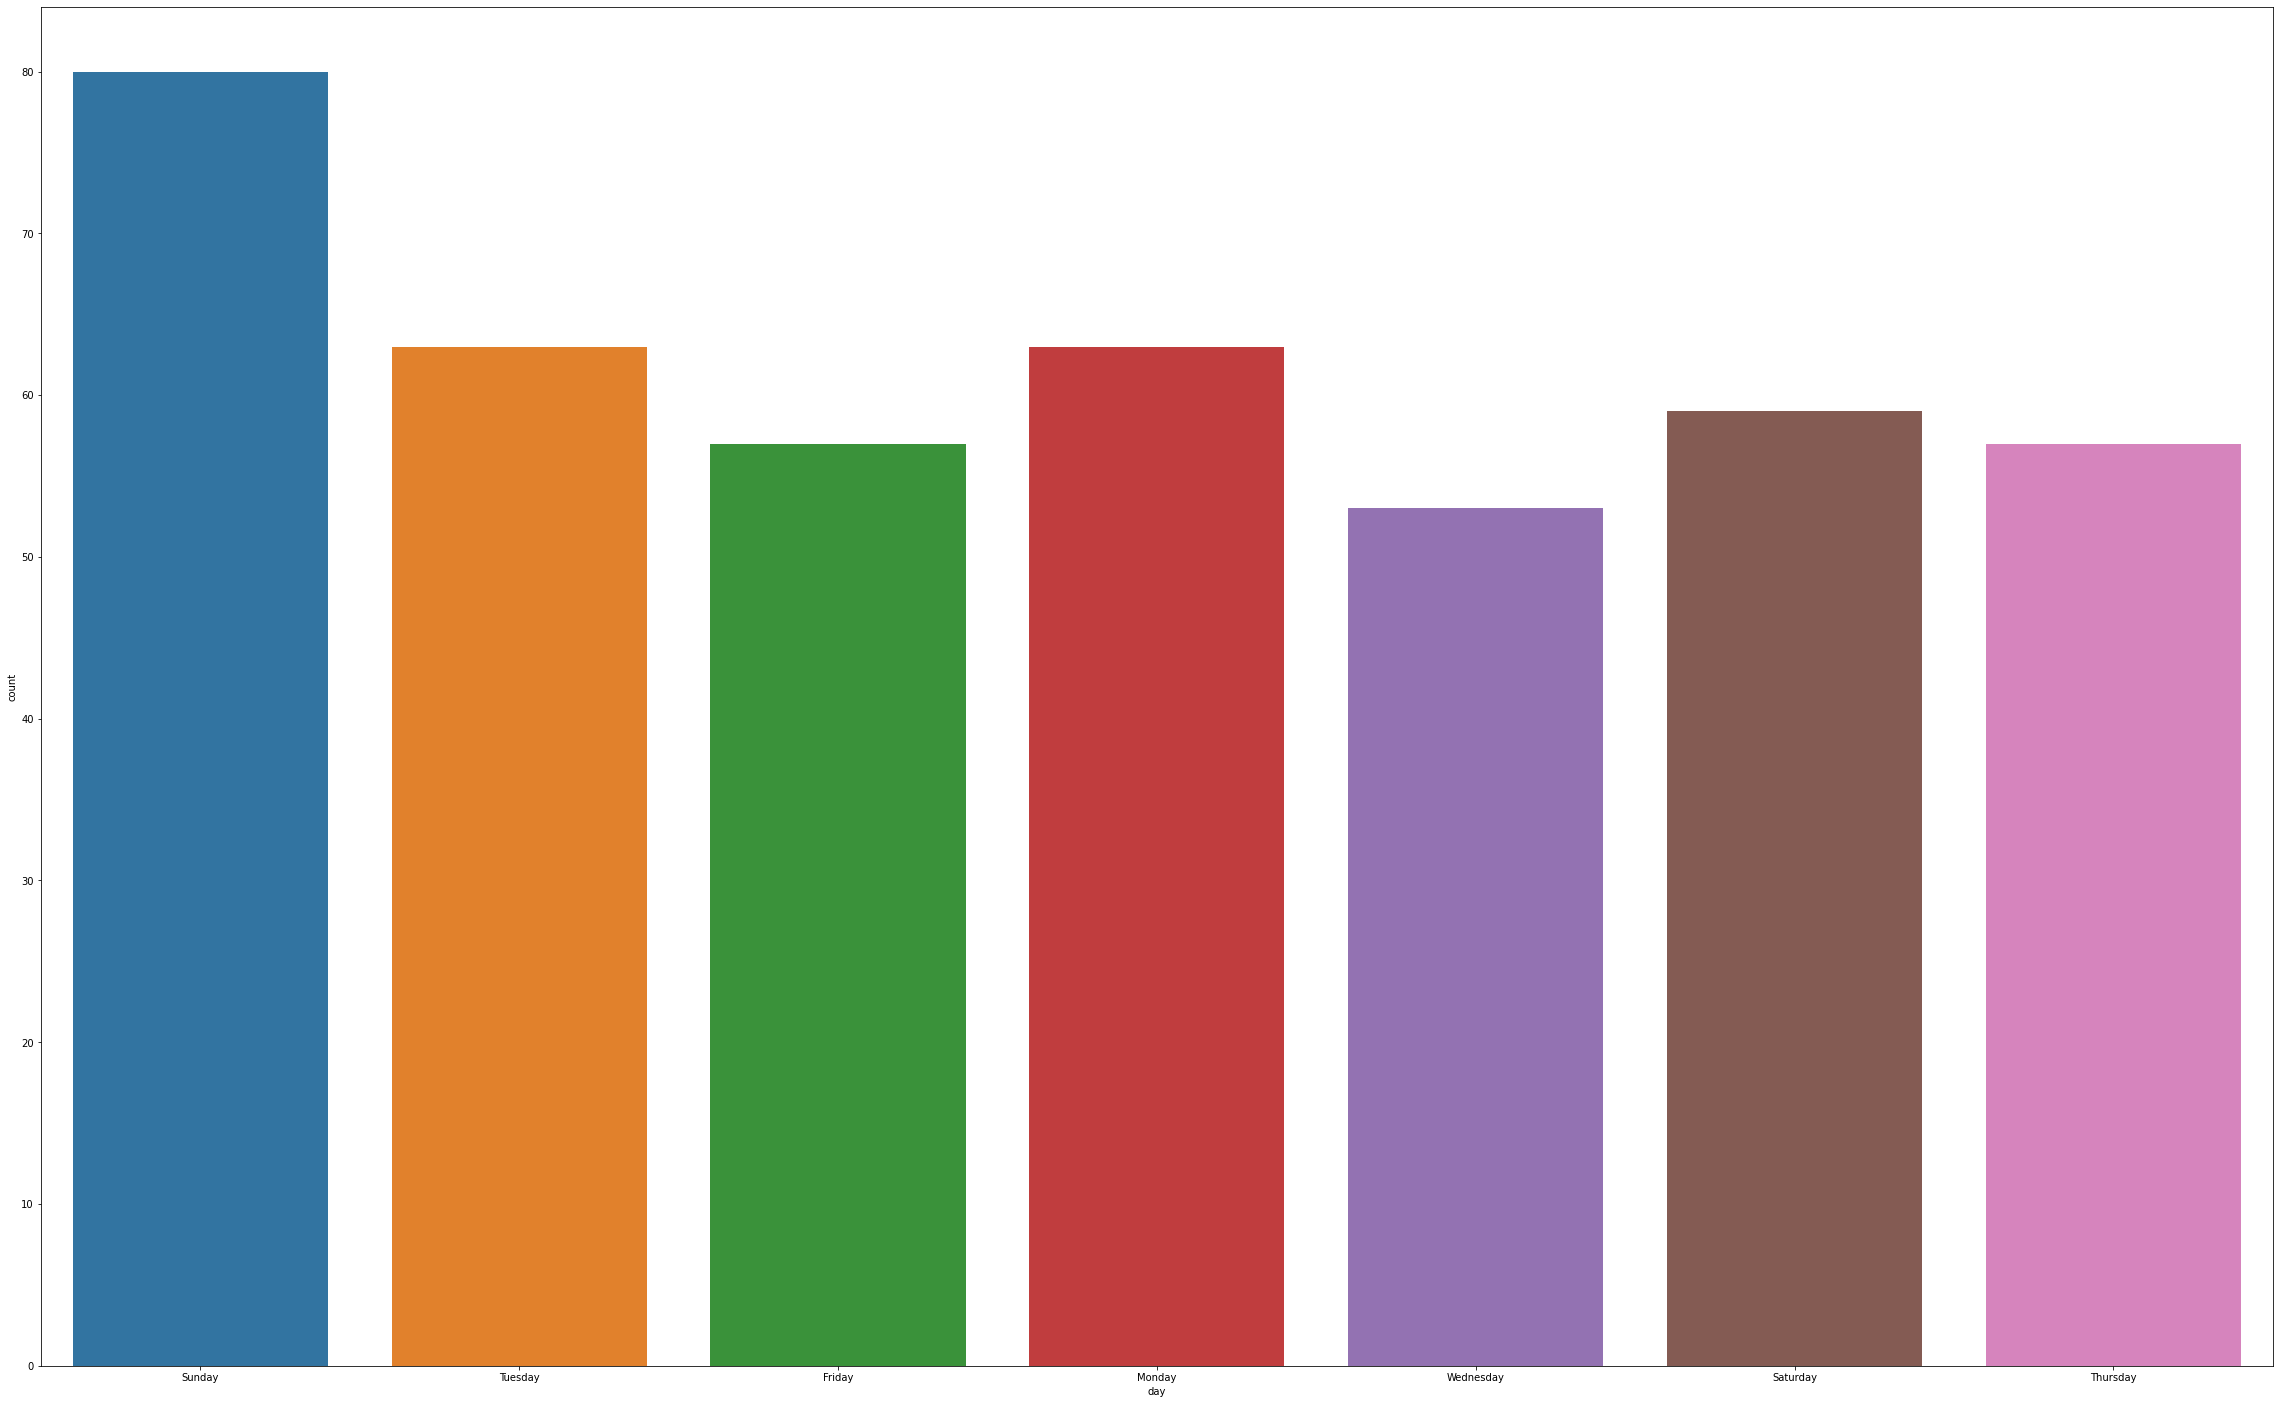

In [ ]:
plt.figure(figsize=(40,25))

sns.countplot('day', data = crime_x)

## **SEX CRIMES**

In [ ]:
temp = crime_5['CRIME_TYPE'] == 'SEX CRIMES'
crime_x = crime_5[temp]
len(crime_x)

1385

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


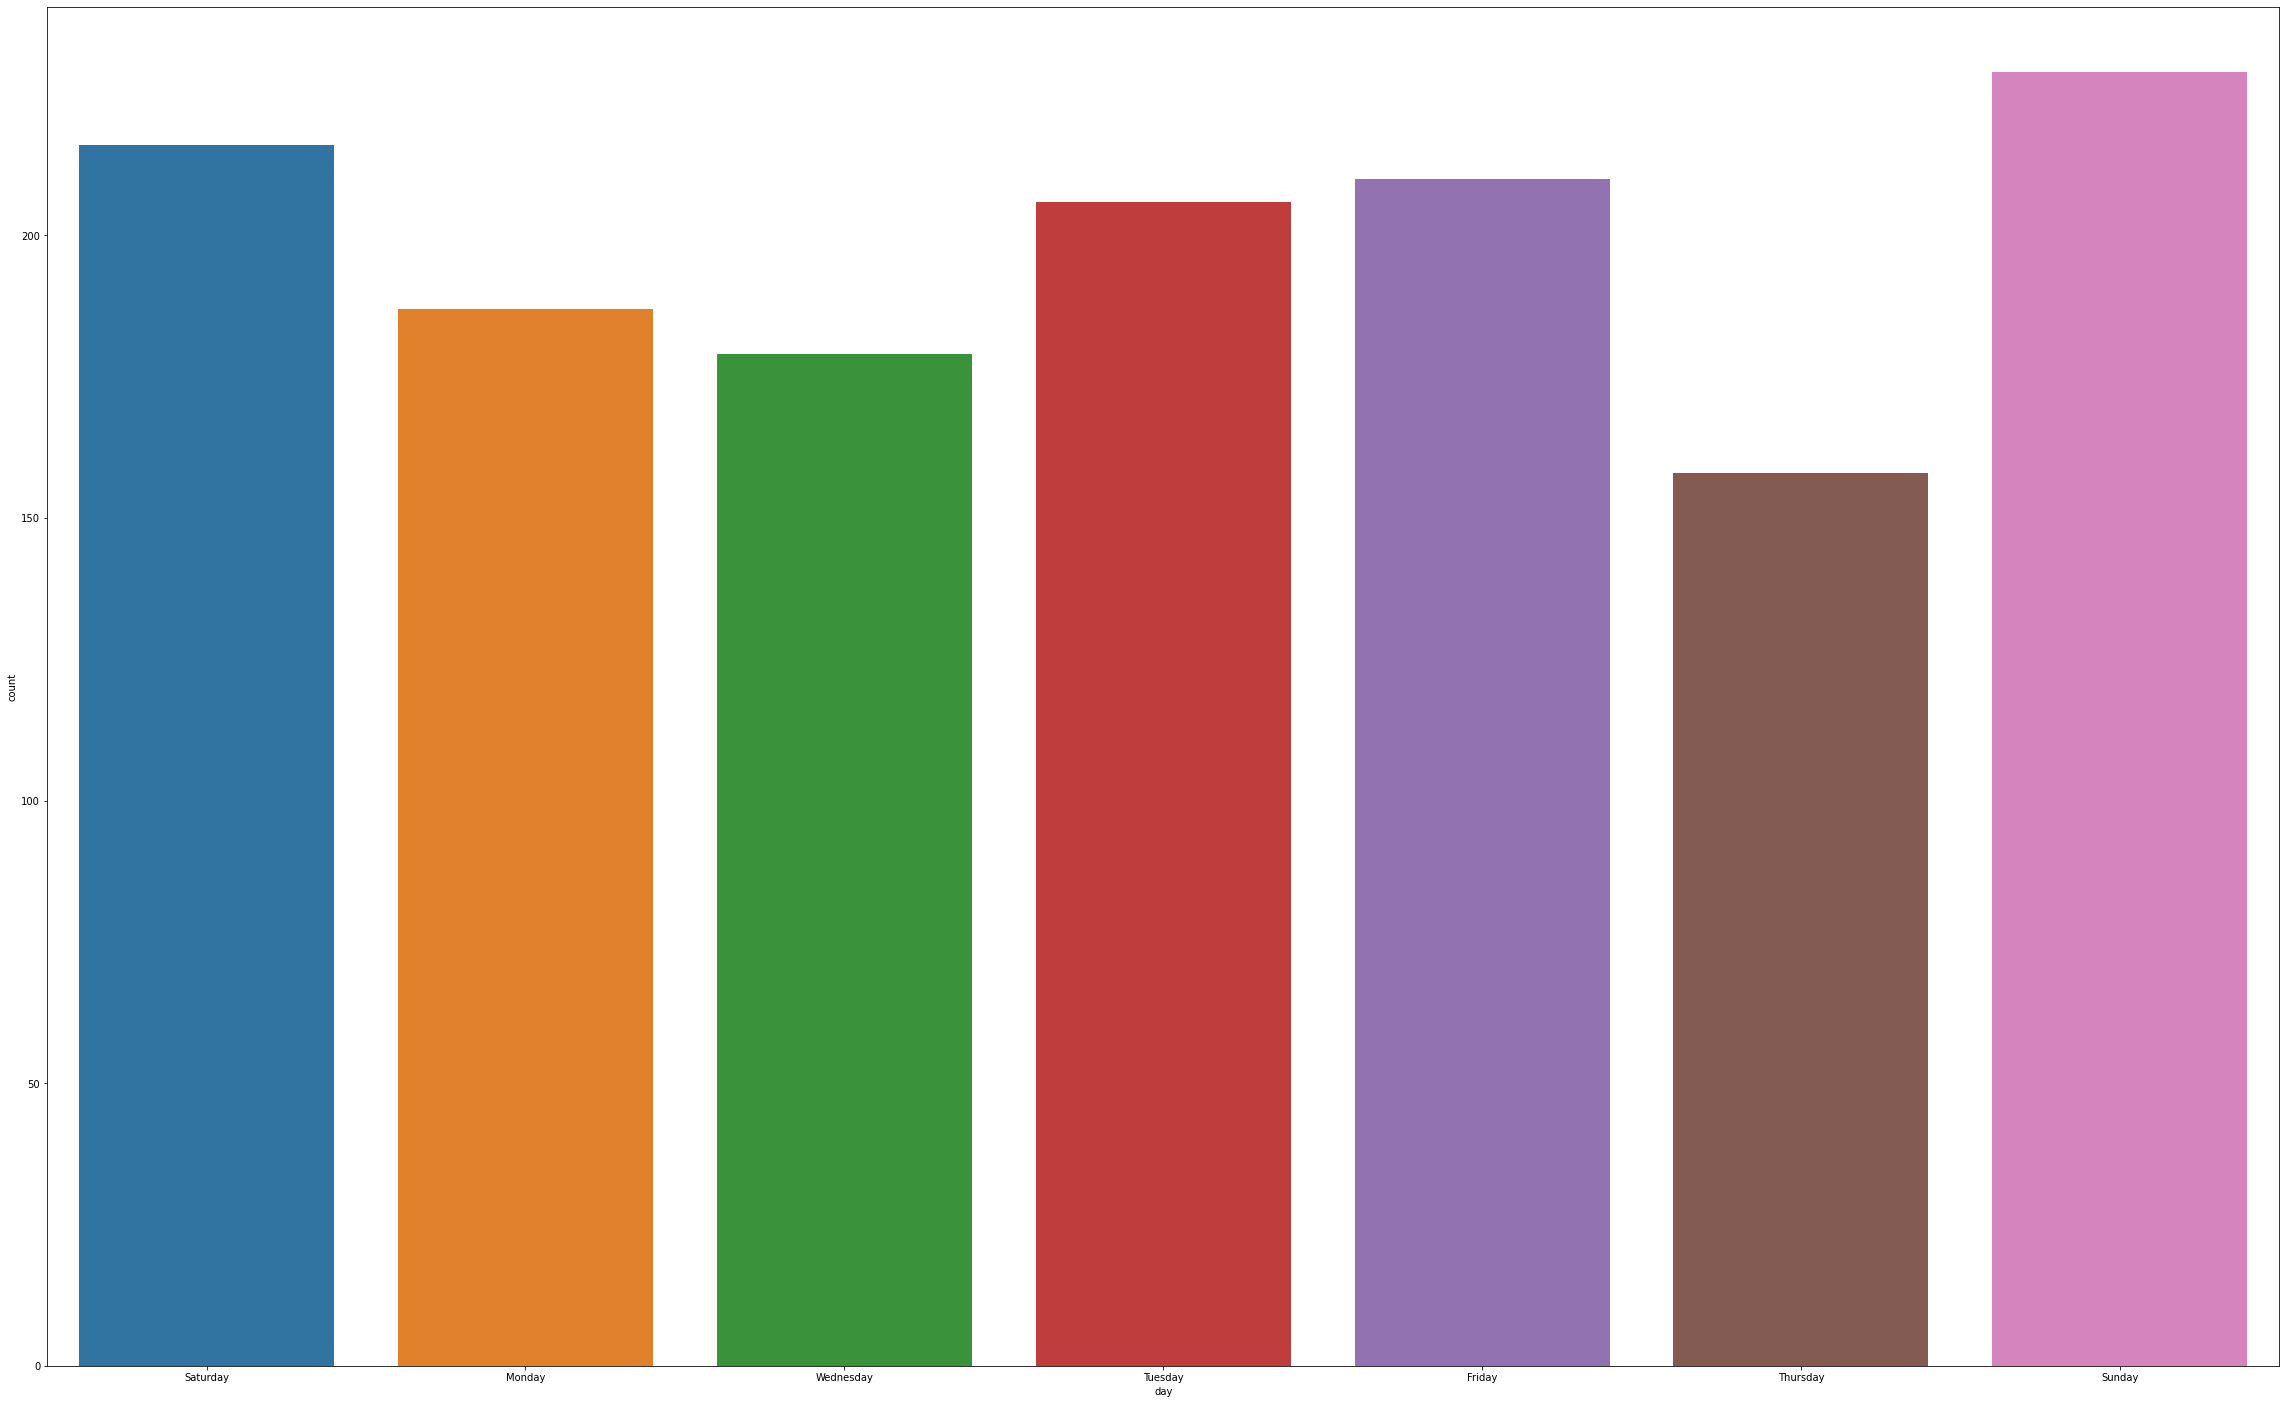

In [ ]:
plt.figure(figsize=(40,25))

sns.countplot('day', data = crime_x)

# **Month**

In [15]:
crime_5['month'] = ""
crime_5

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID,month
0,80-21-011027,2021-02-26 15:51:00,2021-02-26 15:14:00,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,ASSAULT,13B,PART II,COMPLETED,1ST DIVISION,111,RESIDENCE / HOME,2900 BLOCK ALFORD AVE ...,LOUISVILLE,40212,13278,
1,80-21-012203,2021-03-04 14:14:00,2021-03-04 14:00:00,VIOLATION OF KENTUCKY EPO/DVO,ASSAULT,90F,PART II,COMPLETED,6TH DIVISION,613,RESIDENCE / HOME,2000 BLOCK PEABODY LN ...,LOUISVILLE,40218,13279,
2,80-21-012025,2021-03-03 17:33:00,2021-03-03 17:33:00,VIOLATION OF KENTUCKY EPO/DVO,ASSAULT,90F,PART II,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,8300 BLOCK GLOXINIA DR ...,LOUISVILLE,40258,13280,
3,80-21-012384,2021-03-05 22:32:00,2021-02-19 16:00:00,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,1ST DIVISION,111,RESIDENCE / HOME,3600 BLOCK RUDD AVE ...,LOUISVILLE,40212,13281,
4,80-21-500293,2021-03-05 23:40:00,2021-02-18 23:00:00,ANY NON CRIMINAL CHARGE NOT COVERED BY THESE C...,OTHER,90Z,PART II,COMPLETED,4TH DIVISION,411,RESIDENCE / HOME,900 BLOCK S 6TH ST ...,LOUISVILLE,40203,13282,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200432,80-21-012369,2021-03-05 20:22:29,2021-03-03 21:00:00,CRIMINAL MISCHIEF-2ND DEGREE,VANDALISM,290,PART II,COMPLETED,5TH DIVISION,521,RESIDENCE / HOME,600 BLOCK EMILY RD ...,LOUISVILLE,40206,1312158,
200433,80-21-012370,2021-03-05 20:32:35,2021-02-20 15:00:00,THEFT BY FAIL TO MAKE REQ DISPOSITION OF PROP ...,FRAUD,26A,PART II,COMPLETED,5TH DIVISION,513,RENTAL / STORAGE FACILITY,2100 BLOCK BARDSTOWN RD ...,LOUISVILLE,40205,1312159,
200434,80-21-011835,2021-03-02 17:27:00,2021-03-02 17:13:00,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,ASSAULT,13B,PART II,COMPLETED,4TH DIVISION,423,RESIDENCE / HOME,900 BLOCK CAMDEN AVE ...,LOUISVILLE,40215,1312160,
200435,80-21-011883,2021-03-03 00:47:00,2021-03-03 00:47:00,VIOLATION OF KENTUCKY EPO/DVO,ASSAULT,90F,PART II,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,800 BLOCK MULBERRY ST ...,LOUISVILLE,40217,1312161,


In [27]:
for i in range (len(crime_5)):
  crime_5.loc[i,'month'] = crime_5.loc[i,'DATE_REPORTED'].month + ((crime_5.loc[i,'DATE_REPORTED'].year - 2019) * 12)

In [47]:
crime_5['month'].describe()

count     200437
unique        34
top            5
freq        6562
Name: month, dtype: int64

In [59]:
temp = crime_5['CRIME_TYPE'] == 'ASSAULT'
assault = crime_5[temp].groupby(['month']).count()

temp = crime_5['CRIME_TYPE'] == 'SEX CRIMES'
sex = crime_5[temp].groupby(['month']).count()

temp = crime_5['CRIME_TYPE'] == 'DISTURBING THE PEACE'
peace = crime_5[temp].groupby(['month']).count()

temp = crime_5['CRIME_TYPE'] == 'HOMICIDE'
HOMICIDE = crime_5[temp].groupby(['month']).count()

temp = crime_5['CRIME_TYPE'] == 'ROBBERY'
ROBBERY = crime_5[temp].groupby(['month']).count()

temp = crime_5['CRIME_TYPE'] == 'DRUGS/ALCOHOL VIOLATIONS'
drugs = crime_5[temp].groupby(['month']).count()

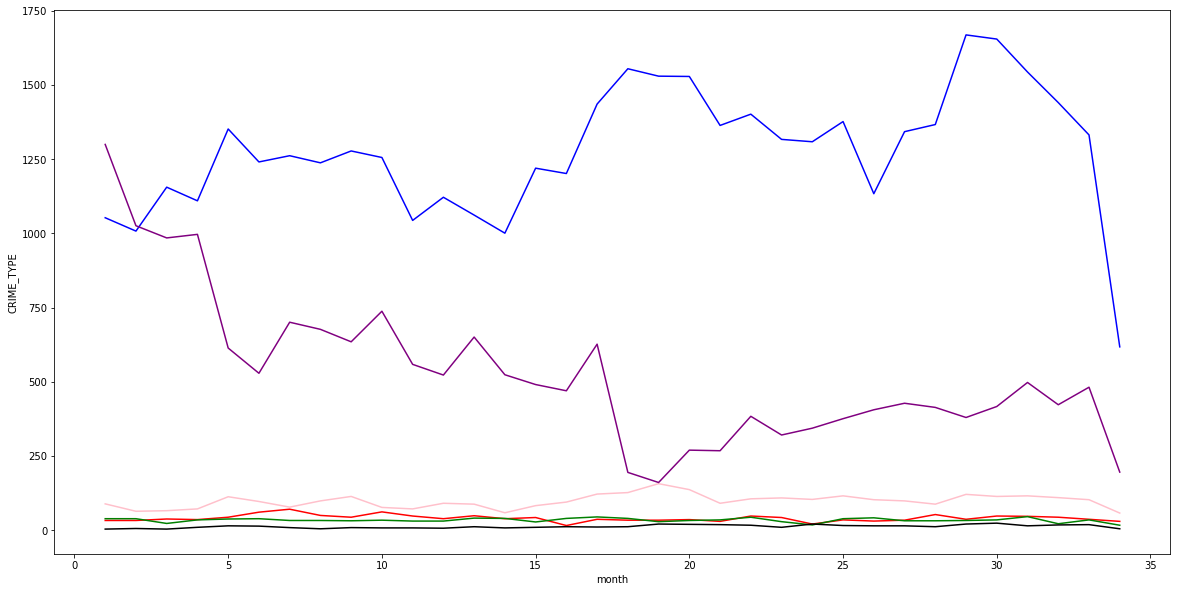

In [63]:
plt.figure(figsize=(20,10))
sns.lineplot(x='month', y='CRIME_TYPE' , color="blue" , data=assault)
sns.lineplot(x='month', y='CRIME_TYPE' , color="red" , data=sex)
sns.lineplot(x='month', y='CRIME_TYPE' , color="green" , data=peace)
sns.lineplot(x='month', y='CRIME_TYPE' , color="black" , data=HOMICIDE)
sns.lineplot(x='month', y='CRIME_TYPE' , color="pink" , data=ROBBERY)
sns.lineplot(x='month', y='CRIME_TYPE' , color="purple" , data=drugs)

# **ATTEMPTED**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


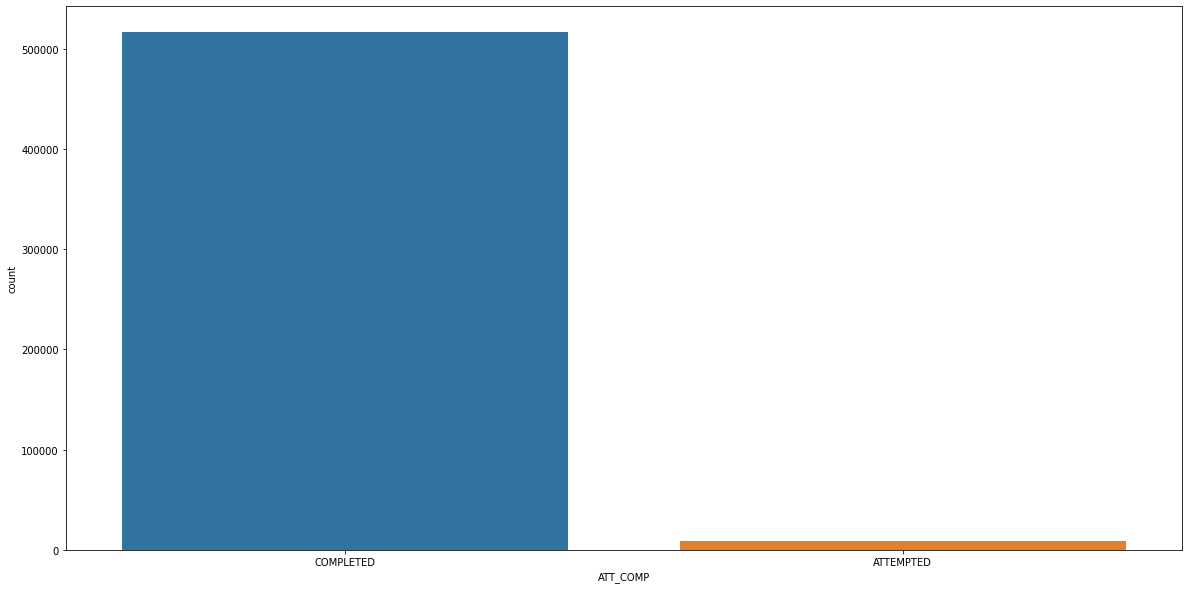

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(crimes['ATT_COMP'])

In [10]:
temp = crimes['ATT_COMP'] == 'ATTEMPTED'
attempt = crimes[temp]
attempt

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
139,80-15-000079,2015-01-01 10:34:00,2015-01-01 10:25:00,ROBBERY - 1ST DEGREE,ROBBERY,120,PART I,ATTEMPTED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,3000 BLOCK GREENWOOD AVE ...,LOUISVILLE,40211,992984
551,80-15-005919,2015-01-23 10:30:00,2015-01-22 19:00:00,BURGLARY - 3RD DEGREE,BURGLARY,220,PART I,ATTEMPTED,1ST DIVISION,135,COMMERCIAL / OFFICE BUILDING,700 BLOCK E JEFFERSON ST ...,LOUISVILLE,40202,1001772
564,80-15-005957,2015-01-23 13:28:00,2015-01-23 13:10:00,BURGLARY - 2ND DEGREE,BURGLARY,220,PART I,ATTEMPTED,8TH DIVISION,823,OTHER RESIDENCE (APARTMENT/CONDO),3300 BLOCK PROTEGE PL ...,LOUISVILLE,40245,1001785
640,80-15-006303,2015-01-24 17:43:00,2015-01-24 16:30:00,BURGLARY - 2ND DEGREE,BURGLARY,220,PART I,ATTEMPTED,6TH DIVISION,625,RESIDENCE / HOME,2900 BLOCK NOE CT ...,LOUISVILLE,40220,1001863
661,80-15-012548,2015-02-18 14:35:00,2015-02-17 21:30:00,TBUT OR DISP ALL OTHERS < $500,THEFT/LARCENY,23H,PART I,ATTEMPTED,7TH DIVISION,735,MALL / SHOPPING CENTER,4800 BLOCK OUTER LOOP ...,LOUISVILLE,40219,1010239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200193,80-21-012131,2021-03-04 18:48:37,2021-03-03 18:00:00,TBUT OR DISP CONTENTS FROM VEH < $500,VEHICLE BREAK-IN/THEFT,23F,PART I,ATTEMPTED,1ST DIVISION,134,PARKING LOT / GARAGE,300 BLOCK E MARKET ST ...,LOUISVILLE,40202,1311919
200204,80-21-012221,2021-03-05 07:12:04,2021-03-05 06:36:04,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,ATTEMPTED,8TH DIVISION,815,PARKING LOT / GARAGE,1700 BLOCK MILITARY AVE ...,LOUISVILLE,40242,1311930
200232,80-21-012293,2021-03-04 21:00:00,2021-03-04 21:00:00,"TBUT OR DISP AUTO > $500 BUT < $10,000",MOTOR VEHICLE THEFT,240,PART I,ATTEMPTED,3RD DIVISION,331,PARKING LOT / GARAGE,7400 BLOCK FEYHURST DR ...,LOUISVILLE,40258,1311958
200395,80-21-012666,2021-03-07 12:06:04,2021-03-05 10:30:00,TBUT OR DISP PARTS FROM VEHICLE $500 OR > BUT ...,VEHICLE BREAK-IN/THEFT,23G,PART I,ATTEMPTED,7TH DIVISION,736,HOTEL / MOTEL / ETC.,6500 BLOCK PARAMOUNT PARK DR ...,LOUISVILLE,40213,1312121


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


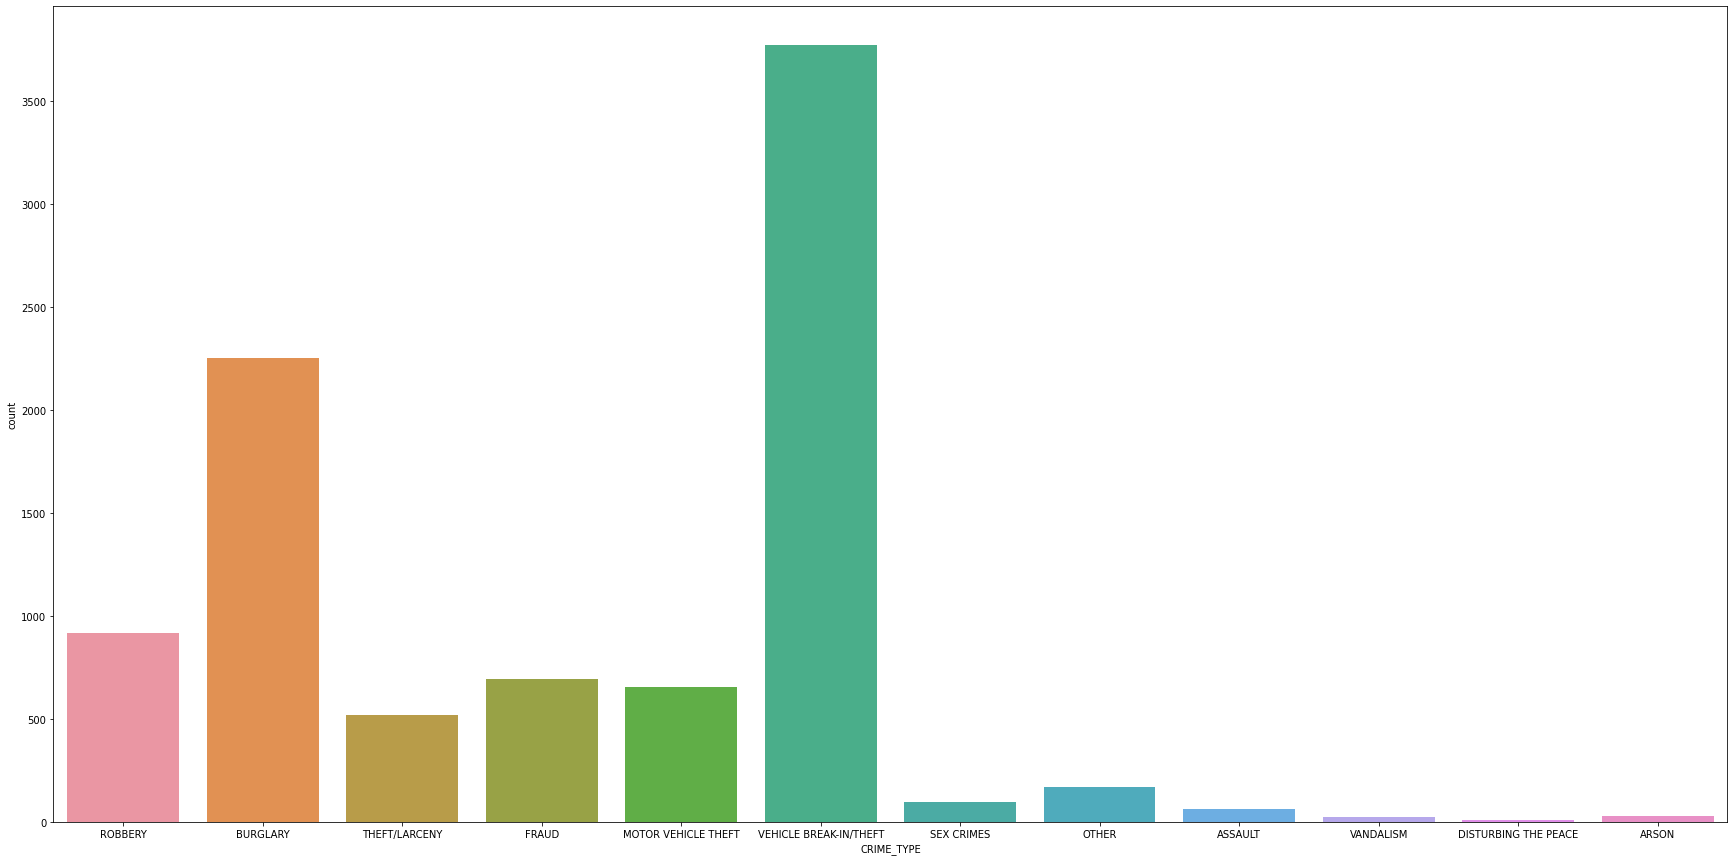

In [15]:
plt.figure(figsize=(30,15))
sns.countplot(attempt['CRIME_TYPE'])